In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# for a cleaner output
import warnings

# install relevant libraries
!pip install pandas matplotlib seaborn openpyxl scipy > /dev/null # for a cleaner output


def visualize_data(data, data_title):

    # for a cleaner output
    warnings.filterwarnings("ignore")

    # Descriptive statistics
    mean = np.mean(data)      # Mean
    median = np.median(data)  # Median
    std_dev = np.std(data)    # Standard deviation
    variance = np.var(data)   # Variance
    minimum = np.min(data)    # Minimum
    maximum = np.max(data)    # Maximum

    print("Descriptive Statistics For " + data_title + " data samples")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Variance: {variance}")
    print(f"Min: {minimum}")
    print(f"Max: {maximum}")

    plt.figure(figsize=(18, 12))

    # Plotting a histogram
    plt.subplot(2, 2, 1)  # plotting it in top left corner
    plt.hist(data, bins=8, color='blue', edgecolor='black')
    plt.title(f'Histogram of {data_title} Times')
    plt.xlabel(f'{data_title} Times')
    plt.ylabel('Frequency')
    plt.xlim(left=0)
    plt.ylim(bottom=0)

    # Plotting a box plot
    plt.subplot(2, 2, 2)  # plotting it in top right corner
    sns.boxplot(data=data, x = data.columns[0], color='lightblue', width=0.1)
    plt.title(f'Boxplot of {data_title} Times')
    plt.xlabel(f'{data_title} Times')
    #plt.xlim(left=0)

    # Flatten the data for QQ plots
    data_raveled = np.ravel(data)

    # Create QQ plot for a general Exponential distribution
    plt.subplot(2, 2, 3)  # plotting it in bottom left corner
    stats.probplot(data_raveled, dist="expon", plot=plt)
    plt.title('QQ Plot: Data vs Exponential Distribution')
    plt.xlim(left=0, right=4.5)
    plt.ylim(bottom=0, top=30)

    # Create QQ plot for Normal distribution
    plt.subplot(2, 2, 4)  # plotting it in bottom right corner
    stats.probplot(data_raveled, dist="norm", plot=plt)
    plt.title('QQ Plot: Data vs Normal Distribution')

    plt.tight_layout()
    plt.show()


Saving checkinsamples.xlsx to checkinsamples.xlsx
Descriptive Statistics For Check-In data samples
Mean: 7.272142962327888
Median: 5.800464063645828
Standard Deviation: CheckIN    5.824713
dtype: float64
Variance: CheckIN    33.927287
dtype: float64
Min: 0.2059821919209098
Max: 21.239600687045


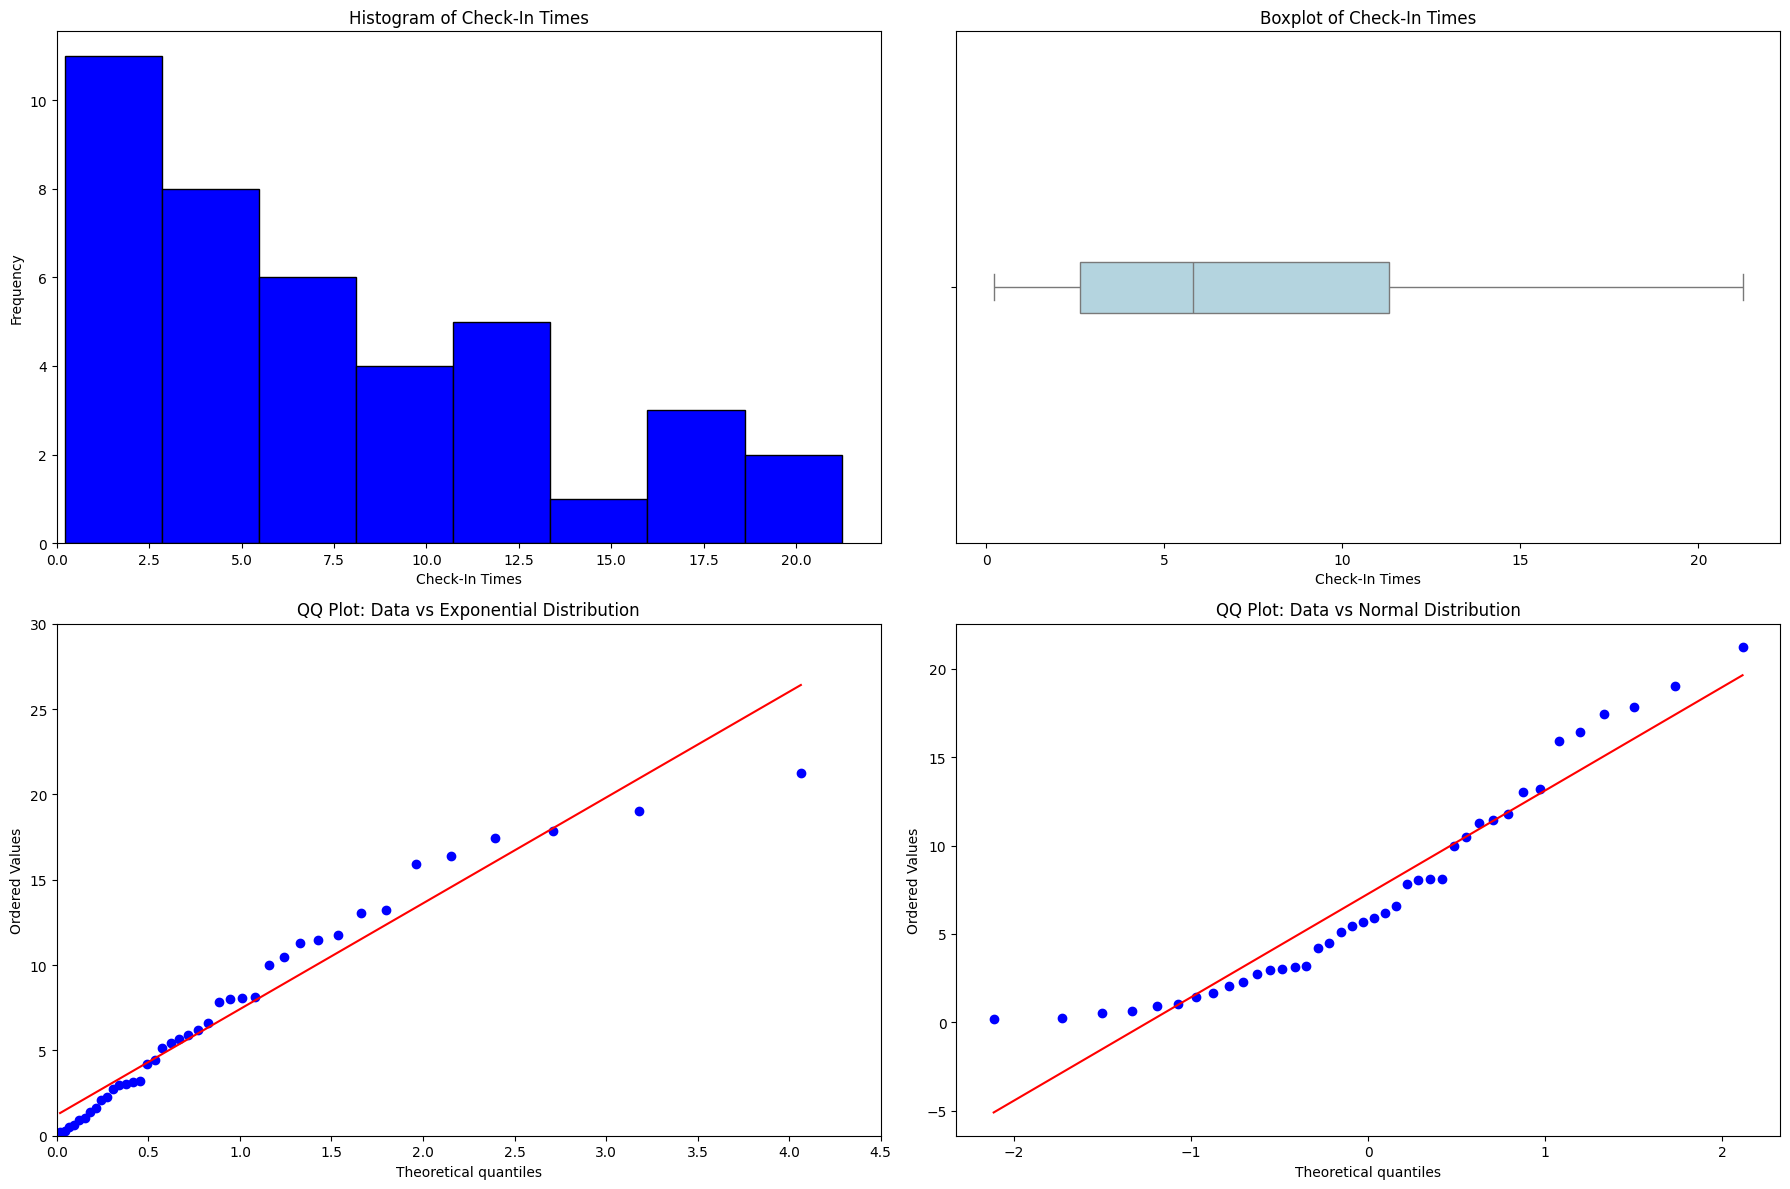

In [ ]:
# Importing and uploading the file
from google.colab import files

# Upload the Excel file
uploaded = files.upload()

# Read the Excel file
excel_file = list(uploaded.keys())[0]  # Get the file name
data_checkin = pd.read_excel(excel_file)

# Call the function with the DataFrame and column name
visualize_data(data_checkin, 'Check-In')



Saving checkoutsamples.xlsx to checkoutsamples.xlsx
Descriptive Statistics For Check-Out data samples
Mean: 4.914793408848787
Median: 2.743327534168214
Standard Deviation: CheckOut    5.204132
dtype: float64
Variance: CheckOut    27.082994
dtype: float64
Min: 0.03488204590825324
Max: 21.2201849130763


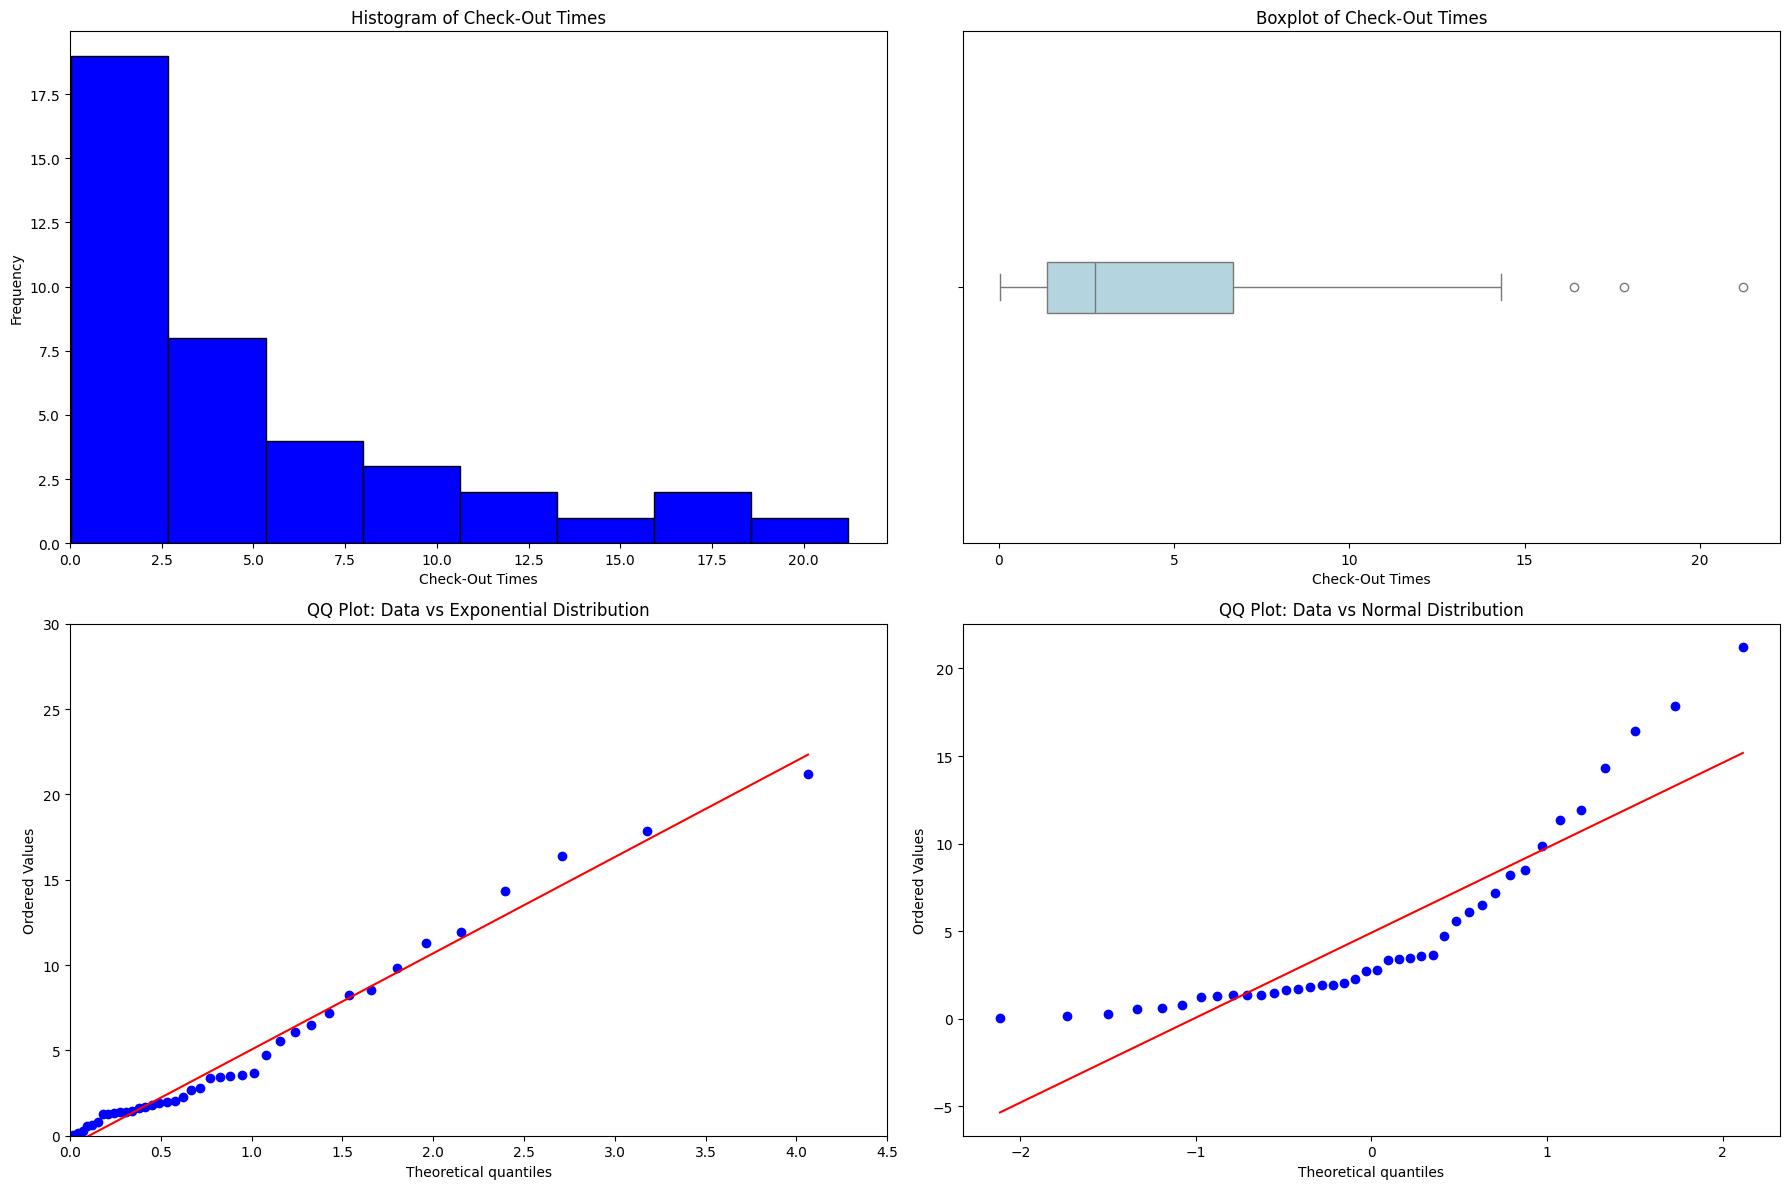

In [ ]:

# Upload the Excel file
uploaded = files.upload()

# Read the Excel file
excel_file = list(uploaded.keys())[0]  # Get the file name
data_checkout = pd.read_excel(excel_file)

# Call the function with the DataFrame and column name
visualize_data(data_checkout, 'Check-Out')





$$
\textbf{זמני שירות של צ'ק-אין וצ'ק-אאוט: ניתוח ראשוני}
$$
---

$$\textbf{:אופי המשתנה ותכליתו}$$
---

$$\text{על פי היכרותנו עם משתנים מקריים, ההתפלגות המתאימה ביותר למשתנים הקשורים לזמן היא התפלגות מעריכית}$$

$$\text{כדי לבחון זאת, השתמשנו בויזואליזציה ובכלים סטטיסטיים ראשוניים כדי להבין את משפחת ההתפלגות המתאימה לנתונים שלנו}$$

---
$$\textbf{:כמות התצפיות}$$
---
$$
\text
{חשוב להדגיש כי ניתוחים סטטיסטיים הופכים למדויקים יותר ככל שכמות התצפיות גדלה. כמות הנתונים שבידינו מקשה על גיבוש מסקנות חד-משמעיות, במיוחד בניתוח של זמני צ'ק-אין. נפרט כעת על ניתוח התרשימים לעיל}
$$

---
$$\textbf{:ניתוח ההיסטוגרמות}$$
---
$$\text{הן עבור זמני צ'ק-אין והן עבור זמני צ'ק-אאוט, ההיסטוגרמה מצביעה על התפלגות אקספוננציאלית, דבר שעולה בקנה אחד עם ההשערות שלנו למשתנה זה}$$

$$
\text
{ניתן לראות כי התצפיות מתרכזות בערכים נמוכים, עם דעיכה הדרגתית ככל שהערכים עולים. הדבר מעיד על צורה שמתאימה להתפלגות מעריכית}$$

$$\text{ההיסטוגרמה של זמני הצ'ק-אין אינה מציגה דפוס ברור כמו ההיסטוגרמה של זמני הצ'ק-אין, אך עדיין ניתן להבחין במגמה שמצביעה על התפלגות אקספוננציאלית}$$



---
$$\textbf{:ניתוח תרשימי הקופסה}$$
---
$$
\textbf{:תרשימי הקופסה מספקים תמונה נוספת על ההתפלגויות}$$

$$\text{ההתפלגות אינה סימטרית, כפי שמעידים הזנבות באורכים שונים}$$

$$\text{כפי שראינו בהיסטוגרמות, רוב התצפיות מקובצות בערכים נמוכים, מה שגם מראה נטייתו שמאלה של הטווח הבין-רבעוני. רוב המסה של ההסתברות מתקבלת עבור ערכים נמוכים של המשתנה}$$


$$\text{הזנב העליון ארוך יותר, בשל הירידה ההדרגתית בכמות התצפיות בערכים גבוהים}$$

$$\text{גם כאן, תרשים הקופסה של זמני הצ'ק-אין לא מעניק תמונה ברורה כפי שמראה תרשים הקופסה של זמני הצ'ק-אאוט. לדוגמה, החציון בנתוני זמני הצ'ק-אין ממוקם באופן יחסי באמצע הטווח הבין-רבעוני, דבר שגם תומך בחוסר-הבהירות שנובעת מההיסטוגרמה}$$

---
$$\textbf{:סטטיסטיקה תיאורית}$$
---
$\text{נשים לב כי ערך התצפית המינימלית בשני המדגמים גדול מאפס, דבר שמתיישב עם הערך המינימלי שמשתנה אקספוננציאלי יכול לקבל}$

$
\text{בנוסף, החציון קטן מהממוצע, מה שנובע מהא-סימטריה החיובית של ההתפלגות. התפלגות אקספוננציאלית גם היא בעלת א-סימטריה חיובית ועבורה דגימות ממנה נצפה לקבל ממוצע מדגם שגדול מהחציון}
$



---
$$\textbf{:בדיקות נוספות}$$
---

$$
\text{השתמשנו בתרשימי כמותונים כדי לבדוק את התאמת הנתונים להתפלגות אקספוננציאלית, אך לא נראתה התאמה ברורה}
$$

$$
\text{בדיקה דומה מול התפלגות נורמלית גם היא לא הניבה התאמה}
$$

---
$$\textbf{:מסקנות}$$
---

$$
\text{כעת ההשערה נותרת בעינה ואנו סוברות כי מדובר בהתפלגות אקספוננציאלית, עבור שני המדגמים. עם זאת, יש צורך בכלים סטיסטיים נוספים להסקת מסקנות מובהקות ואמינות יותר}
$$


---


$$\text{:נחשב את אומד הנראות המקסימלית עבור הפרמטר של ההתפלגות האקספוננציאלית}$$
---

---


### $$\text{Maximum Likelihood Estimation (MLE) for Exponential Distribution}
$$

$$
\text{The probability density function (PDF) of the exponential distribution is given by:}
$$

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & \text{for } x \geq 0, \\
0 & \text{for } x < 0,
\end{cases}
$$

$$
\text{where } \lambda > 0 \text{ is the rate parameter.}
$$


---

### $$\text{Likelihood Function}$$
$$
\text{Given a dataset } ( x_1, x_2, ..., x_n ), \text{ the likelihood function is:}
$$

$$
L(\lambda) = \prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i=1}^n x_i}.
$$

$$
\text{Taking the natural logarithm, the log-likelihood function becomes:}
$$

$$
\ell(\lambda) = \ln L(\lambda) =  n \ln(\lambda) - \lambda \sum_{i=1}^n x_i.
$$

---

### $$ \text{Negative Log-Likelihood} $$

$$
\text{The negative log-likelihood is:}
$$

$$
\mathcal{L}(\lambda) = -\ell(\lambda) = -n \ln(\lambda) + \lambda \sum_{i=1}^n x_i.
$$

---

### $$ \text{Maximizing the Likelihood} $$

$$
\text {To find the maximum likelihood estimate (MLE) of \( \lambda \), we differentiate the log-likelihood function with respect to \( \lambda \) and set it to zero:}
$$

$$
\frac{\partial \mathcal{L}(\lambda)}{\partial \lambda} = \frac{\partial (-\ell(\lambda))}{\partial \lambda} = -\frac{n}{\lambda} + \sum_{i=1}^n x_i = 0.
$$

$$
\text{Solving for \( \lambda \):}
$$

$$
\sum_{i=1}^n x_i = \frac{n}{\lambda}
$$

$$
\lambda = \frac{n}{\sum_{i=1}^n x_i} = \frac{1}{\bar{x}}
$$

$$
\text{where \( \bar{x} \) is the sample mean.}
$$

$$
\text{Thus, the MLE for \( \lambda \) is:}$$

$$
\lambda_{\text{MLE}} = \frac{1}{\bar{x}}.
$$

---

### $$\textbf{כעת נחשב את אומד הנראות המקסימלית של הפרמטר עבור התפלגות אקספוננציאלית ונציג שוב תרשימים כדי להתרשם ולנתח את התוצאות}$$
---

In [ ]:

from scipy.stats import expon

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

def plot_distribution(data, data_title):

    # data title refers to the type of data - check in or check out

    # Calculate MLE for lambda as shown above
    lambda_mle = 1 / np.mean(data)

    # Plot the data histogram and PDF
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.hist(data, bins=7, alpha=0.6, color='g', label='Data Histogram', density=True, edgecolor='black')

    x = np.linspace(0, np.max(data), 50)
    pdf_fitted = lambda_mle * np.exp(-lambda_mle * x)

    plt.plot(x, pdf_fitted, 'r-', label='Fitted Exponential PDF (lambda = {:.4f})'.format(lambda_mle))
    plt.title('Histogram and Fitted Exponential PDF for ' + data_title + ' Times')
    plt.xlabel(data_title + ' Times')
    plt.ylabel('Density')
    plt.legend()
    plt.xlim(left=0)
    plt.ylim(bottom=0)


    # Plot the log-likelihood function
    lambdas = np.linspace(0, 2, 50)
    log_likelihoods = [(-len(data) * np.log(l) + l * np.sum(data)) for l in lambdas]

    plt.subplot(2, 2, 2)
    plt.plot(lambdas, log_likelihoods, 'b-', label='Log-Likelihood Function')
    plt.axvline(lambda_mle, color='r', linestyle='--', label='MLE of lambda = {:.4f}'.format(lambda_mle))
    plt.title('Log-Likelihood Function for ' + data_title + ' Times')
    plt.xlabel('Lambda')
    plt.ylabel('Log-Likelihood')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=0)
    plt.ylim(bottom=0)

    # QQ plot
    plt.subplot(2, 2, 3)
    probplot(data, dist="expon", sparams=(0, 1/lambda_mle), plot=plt)
    plt.title('QQ Plot (Lambda = {:.4f})'.format(lambda_mle))

    plt.xlim(left=0)
    plt.ylim(bottom=0)

    # CDF plot
    plt.subplot(2, 2, 4)
    sorted_data = np.sort(data)
    cdf_fitted = 1 - np.exp(-lambda_mle * sorted_data)
    plt.plot(sorted_data, np.arange(1, len(data_checkin)+1)/len(data_checkin), marker='o', linestyle='', label='Empirical CDF')
    plt.plot(sorted_data, cdf_fitted, 'r-', label='Fitted Exponential CDF (lambda = {:.4f})'.format(lambda_mle))
    plt.title('CDF Comparison for' + data_title +'Times')
    plt.xlabel(data_title + ' Times')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=0)
    plt.ylim(bottom=0)

    plt.tight_layout()
    plt.show()

### $$\textbf{:זמני צ'ק-אין}$$

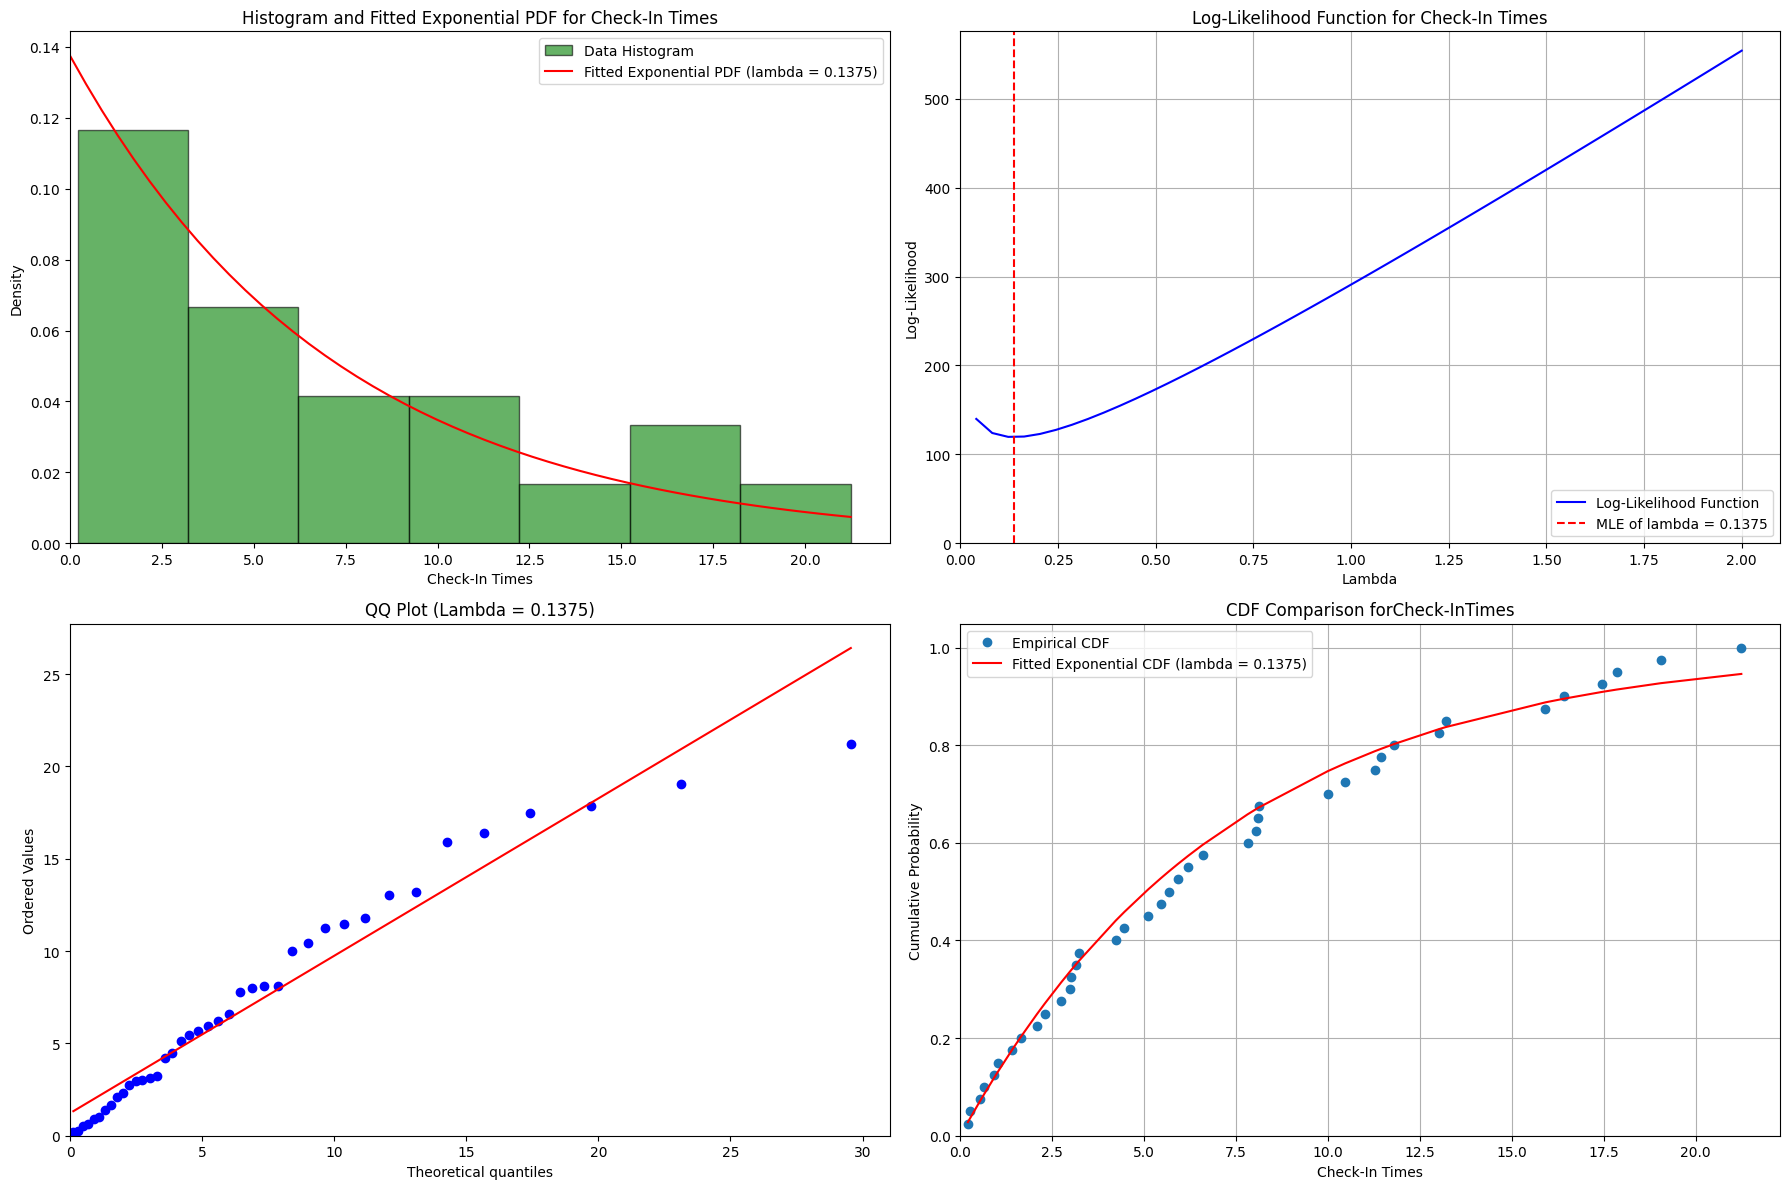

In [ ]:
plot_distribution(data_checkin[data_checkin.columns[0]], 'Check-In')

### $$\textbf{:זמני צ'ק-אאוט}$$

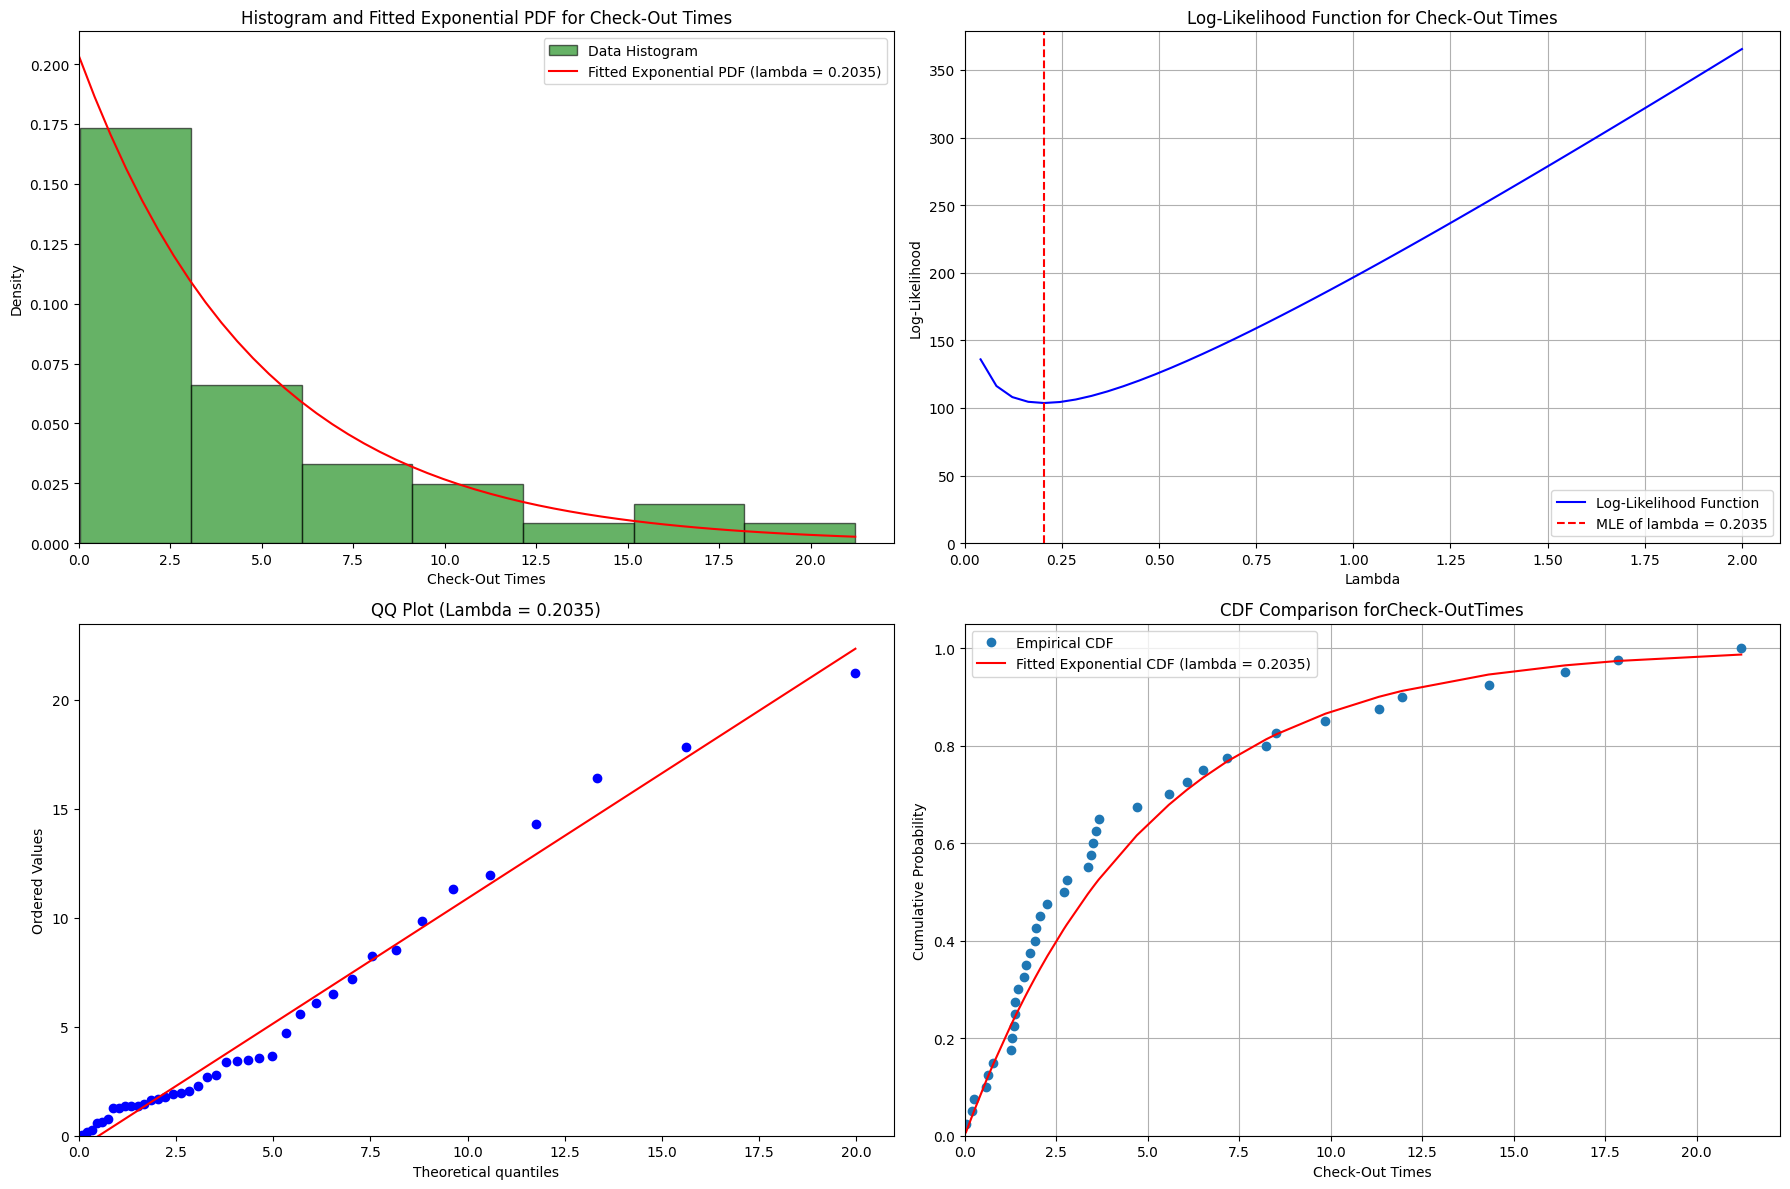

In [ ]:
plot_distribution(data_checkout[data_checkout.columns[0]], 'Check-Out')

### $$\textbf{כעת נבצע מבחנים סטטיסטיים כדי לקבוע האם ההתפלגות אכן מתאימה לנתונים ברמת מובהקות של 10%}
$$

---

### $$\textbf{Kolmogorov–Smirnov test:}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, kstest

# Perform MLE using minimize from scipy.optimize
from scipy.optimize import minimize


# Define the negative log-likelihood function for an exponential distribution
def neg_log_likelihood(lambda_, data):
    return -np.sum(np.log(lambda_) - lambda_ * data)

def distribution_match_test(data):

    # Initial guess for lambda
    initial_guess = 1 / np.mean(data)

    result = minimize(neg_log_likelihood, initial_guess, args=(data,), bounds=[(0.0001, None)])
    lambda_mle = result.x[0]

    # Perform KS test using scipy
    d_statistic, p_value = kstest(data, 'expon', args=(0, 1/lambda_mle))

    print(f"KS Statistic: {d_statistic}")
    print(f"P-value: {p_value}")

    if p_value > 0.1:
        print("Fail to reject the null hypothesis (H0). The data follows the exponential distribution.")
    else:
        print("Reject the null hypothesis (H0). The data does not follow the exponential distribution.")


print('KS Test For Check-In data samples')
distribution_match_test(data_checkin)
print()

print('KS Test For Check-Out data samples')
distribution_match_test(data_checkout)

KS Test For Check-In data samples
KS Statistic: [0.08336679]
P-value: [0.92205168]
Fail to reject the null hypothesis (H0). The data follows the exponential distribution.

KS Test For Check-Out data samples
KS Statistic: [0.12514568]
P-value: [0.51774146]
Fail to reject the null hypothesis (H0). The data follows the exponential distribution.


---
$$\text{ איששנו ברמת מובהקות של 10% כי הדאטה מפולג אקספוננציאלית עם הפרמטרים שחושבו לעיל,KS לפי מבחן}$$

$$\text{לכן, נאמר כי זמן השירות בעמדת הצ'ק אין מתפלג אקספונניאלית עם הפרמטר 0.1375 וזמן השירות בעמדת הצ'ק אאוט מתפלג אקספוננציאלית עם הפרמטר 0.20346 }$$

---

### $$\textbf{אלגוריתמי דגימה}$$

זמן שהייה בבריכה:


$$
f(x) =
\begin{cases}
\frac{x}{6}, & 1 \leq x < 2 \\
\frac{x}{5} + \frac{1}{8}, & 2 \leq x < 3 \\
\frac{1}{8}, & 3 \leq x < 4
\end{cases}
$$

טרנספורם הופכי לזמן שהייה בבריכה:

$$
\int_{1}^{x} \frac{t}{6} \, dt = \left[ \frac{t^2}{12} \right]_1^x = \frac{x^2-1}{12}
$$

$$
\frac{1}{4} + \int_{2}^{x} \left( \frac{t}{5} + \frac{1}{8} \right) \, dt
=\frac{1}{4} + \left[ \frac{t^2}{10} + \frac{t}{8} \right]_2^x
= \ \frac{x^2}{10} + \frac{x}{8}  - \frac{2}{5}
$$



$$
\frac{7}{8} + \int_{3}^{x} \frac{1}{8} \, dt
= \frac{7}{8} + \left[ \frac{t}{8} \right]_3^x
= \frac{x+4}{8}
$$

לכן הפונקציה המצטברת תראה כך:

$$
F(x) =
\begin{cases}
0, & x < 1 \\
\frac{x^2 - 1}{2}, & 1 \leq x < 2 \\
\frac{x^2}{10} + \frac{x}{8} - \frac {2}{5}, & 2 \leq x < 3 \\
\frac{x+4}{8}, & 3 \leq x < 4\\
1, & x > 4
\end{cases}
$$





---


הופכי תחום ראשון:
$$
F(x) = \frac{x^2 - 1}{2} \implies U = \frac{x^2 - 1}{2}
$$

$$
2U = x^2 - 1
$$

$$
x^2 = 2U + 1
$$

$$
x = \sqrt{2U + 1}, \quad 1 \leq x < 2
$$

---

הופכי תחום שני:
$$
F(x) = \frac{x^2}{10} + \frac{x}{8} - \frac{2}{5} \implies U = \frac{x^2}{10} + \frac{x}{8} - \frac{2}{5}
$$

$$
\frac{x^2}{10} + \frac{x}{8} - ׂׂׂׂׂ\left(ׂ ׂ\frac{2}{5} ּּ+ U \right) =0
$$

$$
x = \frac{-\frac{1}{8} \pm \sqrt{ 0.4U + 0.175625}}{8}, \quad 2 \leq x < 3
$$
Choose the positive root.

---

הופכי תחום השלישי:
$$
F(x) = \frac{x + 4}{8} \implies U = \frac{x + 4}{8}
$$

$$
8U = x + 4
$$

$$
x = 8U - 4, \quad 3 \leq x < 4
$$


---



זמן טיפול בספא בשעות:
$$
f(x) =
\begin{cases}
16(x - 0.5), & \ 0.5 \leq x < 0.75 \\
16(1 - x), & \ 0.75 \leq x \leq 1
\end{cases}
$$

טרנספורם הופכי לזמן בספא בשעות:
$$
\int_{0.5}^{x} (16t - 8) \, dt = \left[ 8t^2 - 8t \right]_{0.5}^x = 8x^2 - 8x + 2
$$

$$
0.5 + \int_{0.75}^{x} (16 - 16t) \, dt = 0.5 + \left[ 16t - 8t^2 \right]_{0.75}^x
$$

$$
= 0.5 + \left( 16x - 8x^2 \right) - \left( 16(0.75) - 8(0.75)^2 \right)
$$

$$
= 16x - 8x^2 - 7
$$

לכן הפונקציה המצטברת תראה כך:

$$
F(x) =
\begin{cases}
0, & x < 0.5 \\
8x^2 - 8x + 2, & 0.5 \leq x < 0.75 \\
16x - 8x^2 - 7, & 0.75 \leq x < 1 \\
1, & x \geq 1
\end{cases}
$$


---

הופכי תחום ראשון:
$$
F(x) = 8x^2 - 8x + 2 \implies u = 8x^2 - 8x + 2
$$

$$
\frac{u}{2} = 4x^2 - 4x + 1
$$

$$
\left(2x - 1\right)^2 = \frac{u}{2}
$$

$$
2x = 1 \pm \sqrt{\frac{u}{2}}
$$

$$
x = \frac{1 \pm \sqrt{\frac{u}{2}}}{2}
$$

לסיכום, נבחר בפתרון החיובי:
$$
x = \frac{1 + \sqrt{\frac{u}{2}}}{2}
$$


---


הופכי תחום שני:
$$
F(x) = 4x^2 - 8x + 3.5 + 0.5 \implies u = 4x^2 - 8x + 3.5 + 0.5
$$

$$
2(4x^2 - 8x + 3.5 + 0.5) - 1 = -u
$$

$$
2(4x^2 - 8x + 4) = -u + 1
$$

$$
2(2x - 2)^2 = -u + 1
$$

$$
2x - 2 = \pm \sqrt{\frac{-u + 1}{2}}
$$

$$
x = \frac{2 \pm \sqrt{\frac{-u + 1}{2}}}{2}
$$


לסיכום, נבחר בפתרון השלילי:

$$
x = \frac{2 - \sqrt{\frac{-u + 1}{2}}}{2}
$$

In [ ]:
import random
import math

class Algorithms:

    def Lambda (H,Rav, a):
       Rtotal = 110
       B1 = 1.5
       B2 = 2
       I = 1 if Rav > 0 else 0
       Lambda = a*((Rav/Rtotal)**B1)*((H/10)**B2)*I
       return Lambda

    # arrival of customers sampling algorithm - distributed exponentially
    def Arrival_customers(rating,count_room_available, a):
        lambda_param = Algorithms.Lambda(rating,count_room_available, a)
        u = random.random()
        if lambda_param == 0:
            return 0
        return -math.log(1 - u) / lambda_param

    # sampling algorithm for customer staying time in the hotel
    def stay_time():
       u = random.random()
       if u<0.25:
           return 1
       if 0.25<=u<0.71:
           return 2
       if 0.71<=u<0.91:
           return 3
       if 0.91<=u<0.96:
           return 4
       if 0.96<=u<=1:
           return 5


    def pool_stay_time():
        u = random.random()
        if u<0.25:
           return math.sqrt(12*u+1)
        if 0.25<u<0.875:
           return (-0.125+math.sqrt(0.175625+0.4*u))/0.2
        if u>0.875:
           return 8*u-5


    def Spa_treatment():
       u = random.random()
       if u<0.5:
            return (math.sqrt(u/2)+1)/2
       if u>0.5:
            return (-math.sqrt((-u+1)/2)+2)/2



    def bar_service_time (expected_value = 5, variance = 1.5):
        normal = Algorithms.sample_normal(expected_value,(variance)**0.5)
        if normal>=0:
            return normal
        return Algorithms.bar_service_time(expected_value, variance)




    def Arrival_for_breakfast():
        u = random.random()
        x = -math.log(1 - u) / 15
        return x


    def Breakfast_time():
       normal = Algorithms.sample_normal(40,10**0.5)
       if normal>=0:
           return normal
       return Algorithms.Breakfast_time()

      # Box-Muller transformation
    def sample_normal(mu, sigma):
        u1 = random.random()
        u2 = random.random()
        z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        return mu + sigma * z


    def Customer_type():

        u = random.random()

        if u < 0.4:  # families
            u2 = random.random()
            if u2 < 0.2:  # family of 4
                return 4
            elif u2 < 0.7:  # family of 5
                return 5
            else:  # family of 3
                return 3

        us = random.random()  # used for indicating whether a suite is assigned or not

        if u < 0.8:  # couples
            if us <= 0.1:
                return 2, 'suite'
            return 2

        # individuals
        if us <= 0.1:
            return 1, 'suite'
        return 1


    def check_in_service_time():
        lambda_param = 0.1375 # the parameter that we calculated in the distribution analysis
        u = random.random()
        return -math.log(1 - u) / lambda_param


    def check_out_service_time():
        lambda_param = 0.20346 # the parameter that we calculated in the distribution analysis
        u = random.random()
        return -math.log(1 - u) / lambda_param








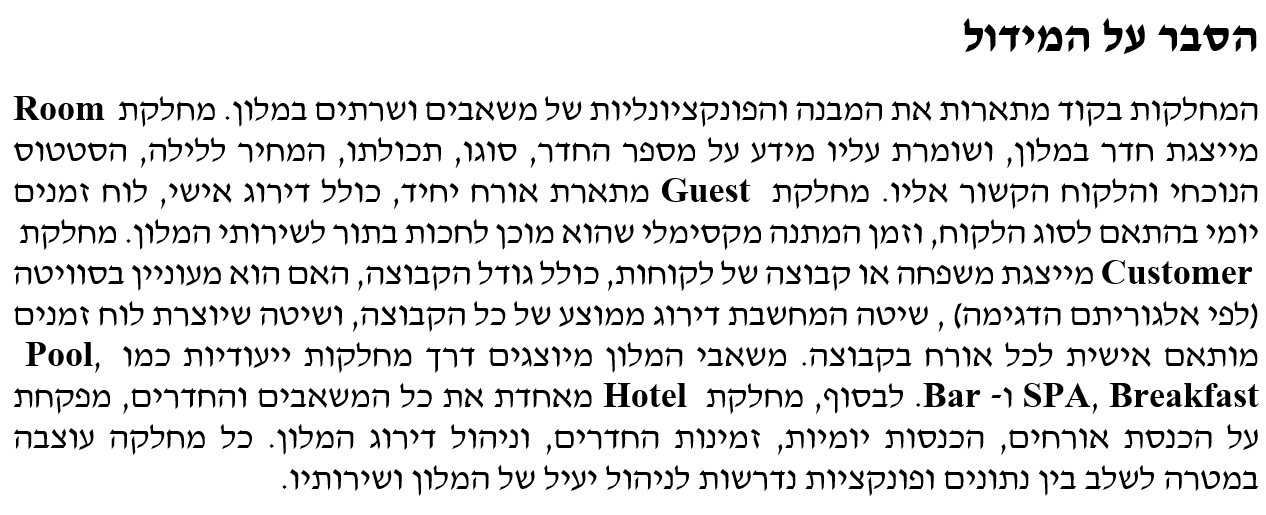

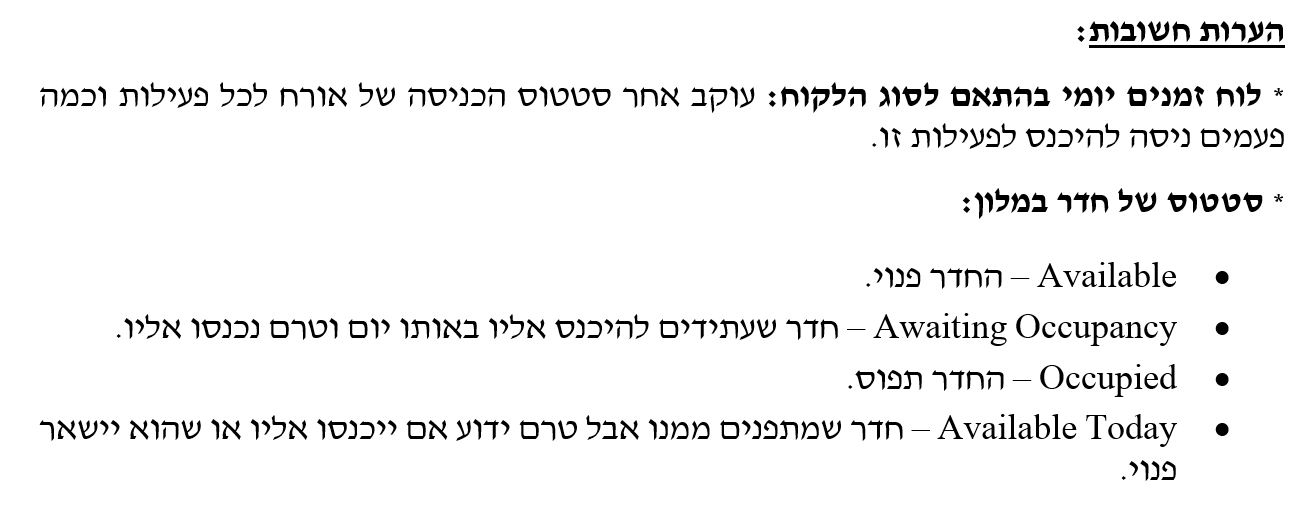

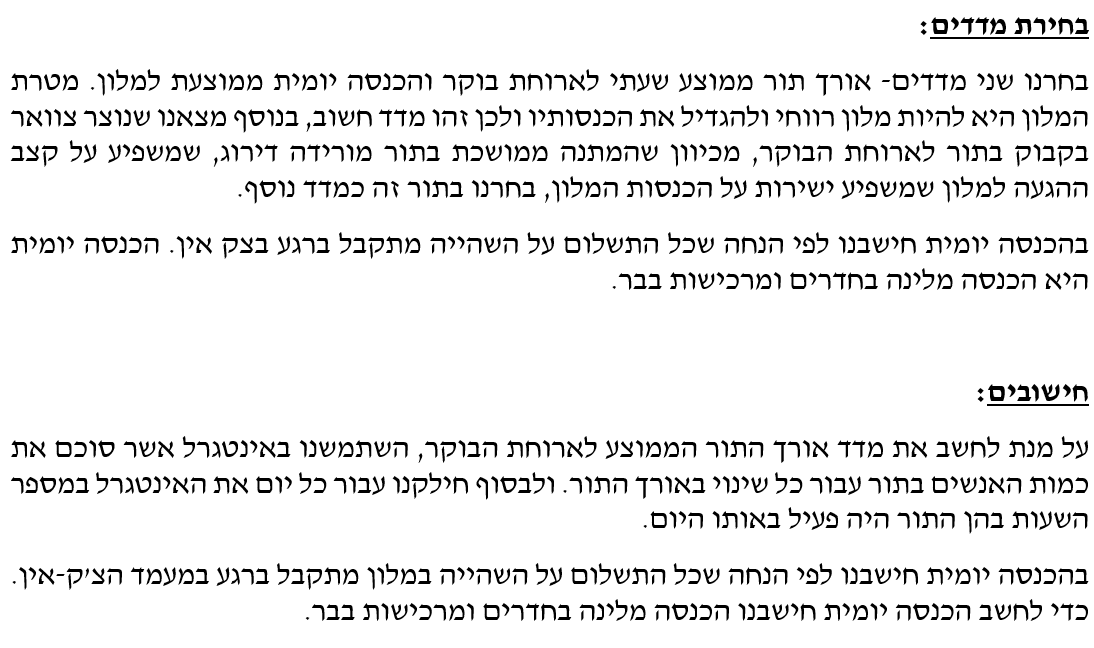


$$\textbf{תרשים אירועים}$$

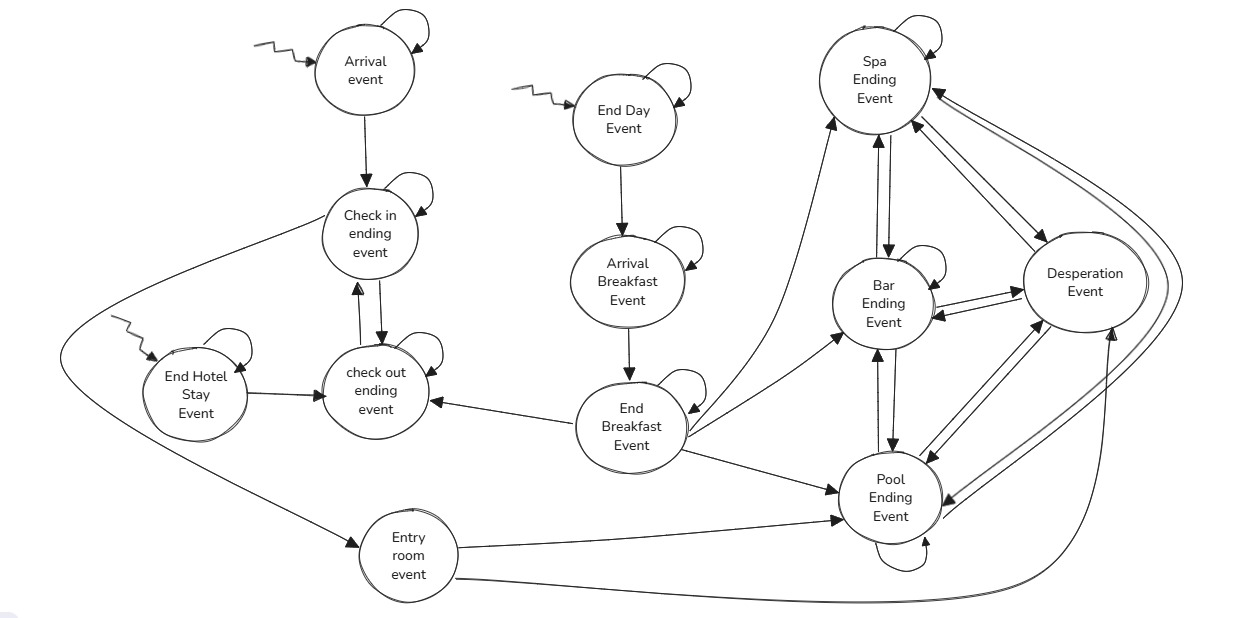



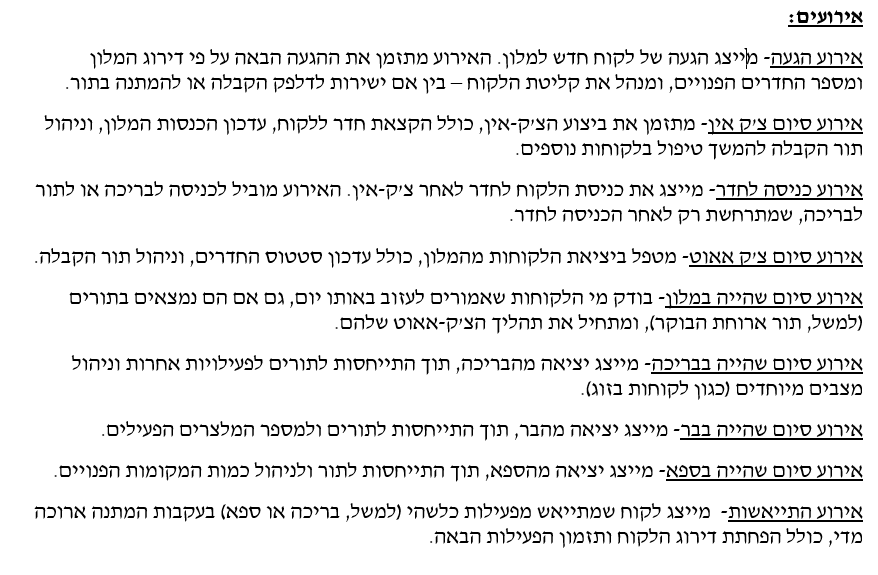

In [ ]:


class Room:
    def __init__(self, room_number, room_type,capacity, price_per_night):
        self.room_number = room_number
        self.room_type = room_type
        self.capacity = capacity
        self.price_per_night = price_per_night
        self.status = 'Available' #Available, Awaiting Occupancy,Occupied, Available today
        self.customer = None


    def is_available(self):
        if self.status == 'Available' or  self.status == 'Available today':
            return True
        return False

    def change_status(self, status):
        self.status = status

    def customer_entering(self, customer):
        self.customer = customer


class Guest:
    def __init__(self, customer):
        self.rating = 10
        self.max_waiting_time = 10 if customer.group_size >= 3 else 15 if customer.group_size == 2 else 20
        self.customer = customer
        self.diary = []

    def decrease_rating(self, decrease):
        self.rating -= decrease
        if self.rating < 0:
            self.rating = 0

    def get_rating(self):
        return self.rating


    # entry to activity
    def enter_successful(self, activity):
        for act in self.diary:
            if act[0] == activity:
                act[1] = True
                break

    # increasing the number of attempts to enter an activity
    def attempt_failed(self, activity):
        for act in self.diary:
            if act[0] == activity:
                act[2] += 1
                break

    def get_next_activity(self, last_activity = None):
        if last_activity is not None:
            self.attempt_failed(last_activity)
        unattempted_activities = [act for act in self.diary if not act[1] and act[0] != last_activity and act[2] < 2]
        if unattempted_activities:
            return unattempted_activities[0][0]  # returns the activity which has the least number of attempts
        return None


class Customer:
    def __init__(self, familytype):
        if isinstance(familytype, tuple):
            self.group_size, self.room_type = familytype
        else:
            self.group_size = familytype
            self.room_type = None


        self.max_waiting_time = 10 if self.group_size >= 3 else 15 if self.group_size == 2 else 20
        self.guests = []
        self.leaving_date = None
        for i in range(self.group_size):
            guest = Guest(self)
            self.guests.append(guest)
        self.room = None

    def get_average_rating(self):
        total_rating = sum(guest.get_rating() for guest in self.guests) #sum all the guest rating
        return total_rating / self.group_size #avarege

    def decrease_rating(self, decrease):
        for guest in self.guests:
            guest.decrease_rating(decrease)

    def update_room(self,room):
        self.room = room

    def initialize_schedule(self):
        if self.group_size >= 3:

            for guest in self.guests:
                if random.random() < 0.8:
                   guest.diary = [["Pool", False, 0],["Bar", False, 0]]
                else:
                    guest.diary = [["Bar", False, 0], ["Pool", False, 0]]

        if self.group_size == 2:
            if random.random() < 0.7:
                for guest in self.guests:
                    guest.diary = [["Pool", False, 0],["SPA", False, 0]]
            else:
                self.guests[0].diary = [["Pool", False, 0], ["SPA", False, 0]]
                self.guests[1].diary = [["Room", False, 0], ["SPA", False, 0]]
        else:

            self.guests[0].diary = [["Pool", False, 0], ["SPA", False, 0], ["Bar", False, 0]]



class Pool:
    def __init__(self, chair_count=50):
        self.chair_count = chair_count
        self.occupied_chairs = 0


    def use_pool(self, group_size): #true if there is place in the pool
        return self.occupied_chairs + group_size <= self.chair_count

    def enter_pool(self, group_size):
        self.occupied_chairs += group_size


    def leave_pool(self, group_size):
        self.occupied_chairs -= group_size



class SPA:
    def __init__(self, capacity=30):
        self.capacity = capacity
        self.occupied = 0


    def use_SPA(self, group_size): #true if there is place in the pool
        return self.occupied + group_size <= self.capacity

    def enter_SPA(self, group_size):
        self.occupied += group_size

    def leave_SPA(self, group_size):
        self.occupied -= group_size


class Breakfast:
    def __init__(self, seat_count):
        self.seat_count = seat_count
        self.occupied_seats = 0
        self.Customers_for_Breakfast = []

    def arrive_for_breakfast(self, group_size):
        return self.occupied_seats + group_size <= self.seat_count

    def enter_breakfast(self, group_size):
         self.occupied_seats += group_size


    def leave_breakfast(self, group_size):
        self.occupied_seats -= group_size


    def get_Customers_for_Breakfast(self):
        return self.Customers_for_Breakfast




class Bar:
    def __init__(self):
        self.drink_prices = {'coffee': 3, 'juice': 3, 'beer': 3, 'wine': 10, 'cocktail': 15, 'whiskey': 15, 'cognac': 15}
        self.food_prices = {'toast': 10, 'salad': 12, 'ice_cream': 3, 'nuggets_chips': 15}
        self.total_income = 0
        self.busy_servers = 0
        self.total_servers = 2



    def place_order(self, guest):
        u1 = random.random()  # retrieves a continuous uniform distributed variable to indicate whether it is a meal or a drink
        if u1<0.5: # ordering food
            u2 = random.random()
            if u2<0.25:
                return self.food_prices["toast"]
            if 0.25<=u2<0.5:
                return self.food_prices["salad"]
            if 0.5<=u2<0.75:
                return self.food_prices["ice_cream"]
            else:
                return self.food_prices["toast"]

        else: # ordering drink
            u3 = random.random()
            if(guest.customer.group_size>2): # guest under reservation of a family, can't order alcoholic drinks

                if u3<0.5:
                    return self.drink_prices["coffee"]
                else:
                    return self.drink_prices["juice"]
            else: # not family
                if u3 < (1/7):
                    return self.drink_prices["coffee"]
                if (1/7)<= u3 <(2/7):
                    return self.drink_prices["juice"]
                if (2/7)<= u3 <(3/7):
                    return self.drink_prices["beer"]
                if (3/7)<= u3 <(4/7):
                    return self.drink_prices["wine"]
                if (4/7)<= u3 <(5/7):
                    return self.drink_prices["cocktail"]
                if (5/7)<= u3 <(6/7):
                    return self.drink_prices["whiskey"]
                else:
                    return self.drink_prices["cognac"]





In [ ]:
class Hotel:
    def __init__(self, breakfast_capacity):
        self.rooms = []
        self.total_guests = 0
        self.total_income = 0
        self.rating = 7
        self.pool = Pool()
        self.spa = SPA()
        self.bar = Bar()
        self.breakfast = Breakfast(breakfast_capacity)
        self.busy_reception_servers = 0
        self.daily_income = []


        #create rooms
        for _ in range(30):
            self.rooms.append(Room(len(self.rooms) + 1, "family", 5, 250)) #4or5
        for _ in range(40):
            self.rooms.append(Room(len(self.rooms) + 1, "minifamily", 3, 250))#2or3
        for _ in range(30):
            self.rooms.append(Room(len(self.rooms) + 1, "couple", 2, 250))#1or2
        for _ in range(10):
            self.rooms.append(Room(len(self.rooms) + 1, "suite", 2, 370))#1or2


    def check_in_room(self, group_size, room_type=None):
        if room_type == "suite" and group_size<=2:
            for room in self.rooms:
                if room.room_type == "suite" and room.is_available():
                    self.total_guests += group_size
                    self.total_income += room.price_per_night * group_size
                    return room
        if group_size>=4:
            for room in self.rooms:
                if room.room_type == "family" and room.is_available():
                    self.total_guests += group_size
                    self.total_income += room.price_per_night * group_size
                    return room
        if group_size<=2:
            for room in self.rooms:
                if room.room_type == "couple" and room.is_available():
                    self.total_guests += group_size
                    self.total_income += room.price_per_night * group_size
                    return room

        if group_size>=2 and group_size<4:
            for room in self.rooms:
                if room.room_type == "minifamily" and room.is_available():
                    self.total_guests += group_size
                    self.total_income += room.price_per_night * group_size
                    return room

        return None


    def count_room_available(self):
        count = 0
        for room in self.rooms:
            if room.is_available():
              count += 1
        return count

    def update_rating(self, new_rating):
       self.rating =  new_rating






### $$\textbf{תרשימי טיפול באירועים}$$

$$\textbf{תרשים טיפול באירוע סיום ארוחת בוקר}$$

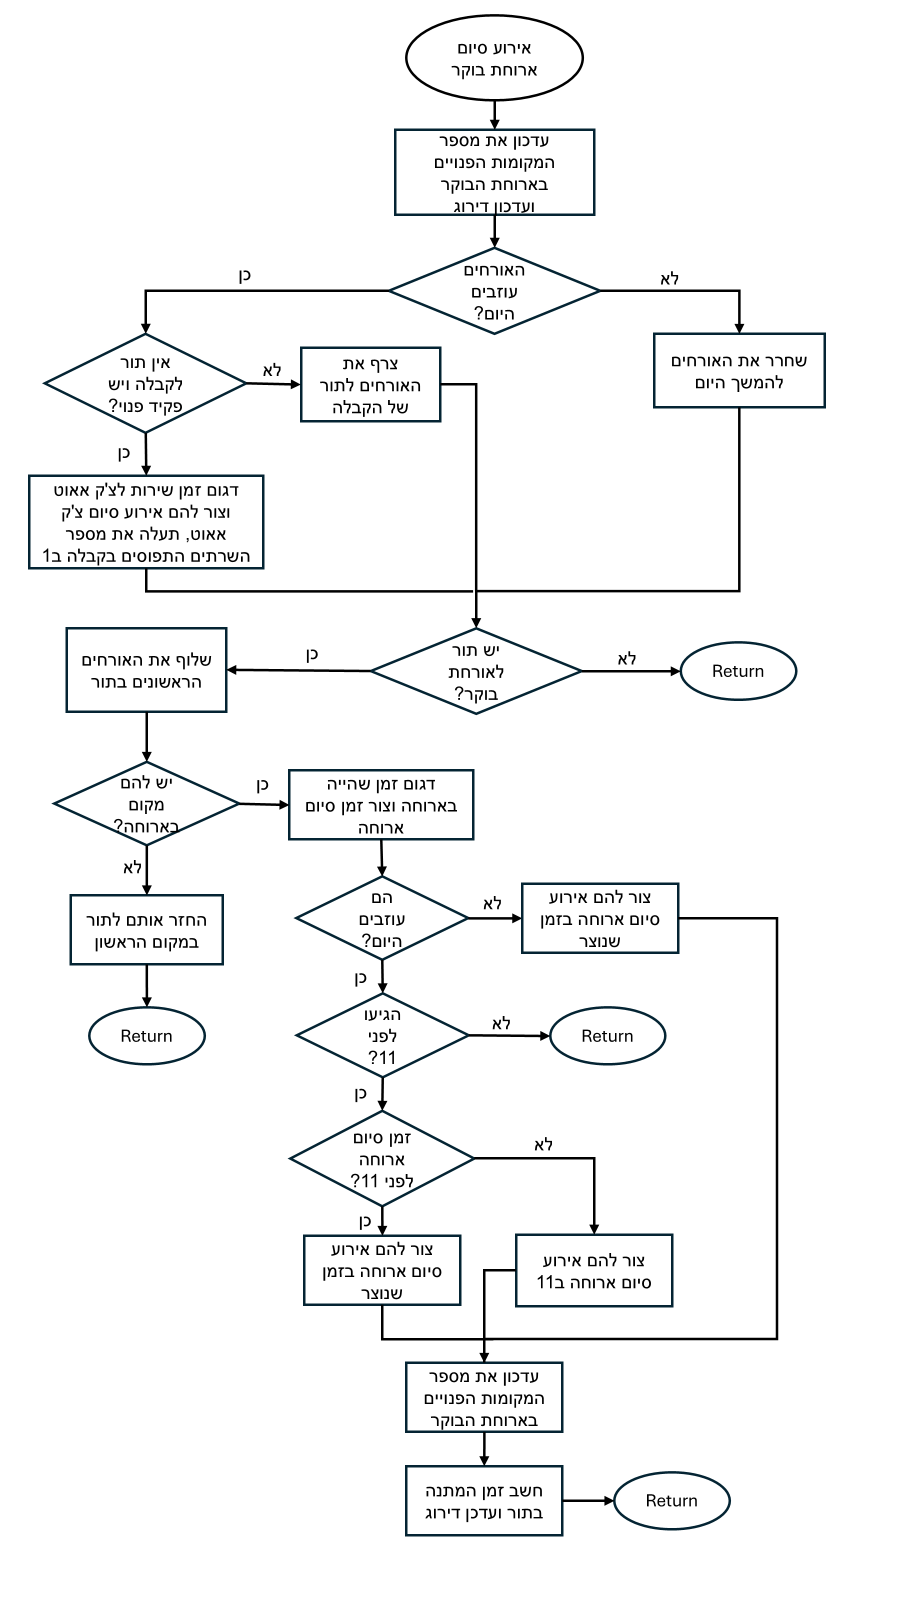



$$\text{תרשים טיפול באירוע סיום בצ'ק אאוט}$$

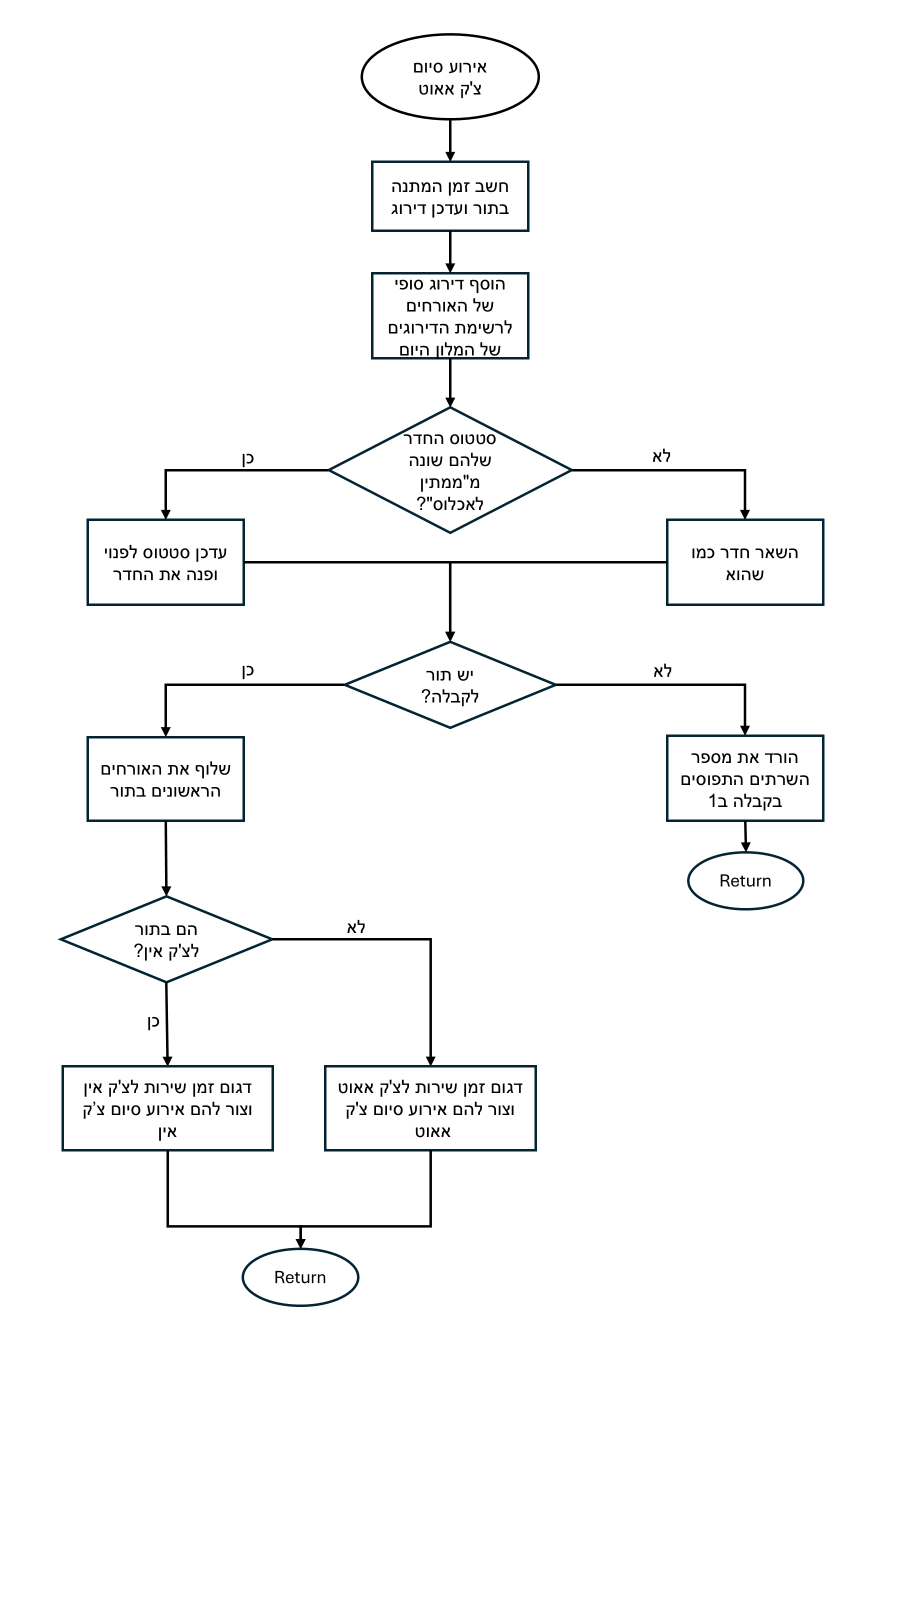


$$\text{תרשים טיפול באירוע התייאשות}$$

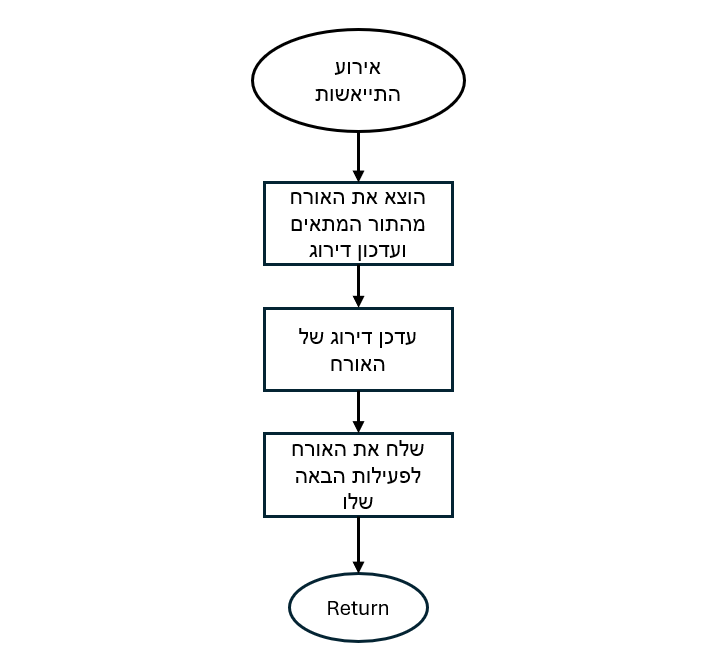

### $$\text{אירועים}$$

In [ ]:
from datetime import timedelta, datetime, time
import heapq
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import numpy as np

class Event:
    def __init__(self, time):
        self.time = time

    def __lt__(self, other):
        return self.time < other.time

    def handle(self, simulation):
        raise NotImplementedError("Handle method must be implemented by subclasses")



class ArrivalEvent(Event):
    def handle(self, simulation):

        busy_reception_servers = simulation.hotel.busy_reception_servers

        # Schedule the next arrival event
        if self.time.hour >= 17:
            next_arrival_time = self.time + timedelta(hours=15)
        else:
            rating = simulation.hotel.rating
            count = simulation.hotel.count_room_available()
            next_arrival_time = self.time + timedelta(hours=Algorithms.Arrival_customers(rating, count, simulation.alpha))
        simulation.schedule_event(ArrivalEvent(next_arrival_time))

        # Handle the current arrival
        if simulation.queues['Reception queue'].empty() and busy_reception_servers < 2:
            next_check_in_time = self.time + timedelta(minutes=Algorithms.check_in_service_time())
            customer = Customer(Algorithms.Customer_type())
            simulation.schedule_event(CheckInEvent(next_check_in_time, (customer, self.time)))
            simulation.hotel.busy_reception_servers += 1
        else:
            customer = Customer(Algorithms.Customer_type())
            simulation.queues['Reception queue'].append((customer, self.time, 'check in'), self.time)



class CheckInEvent(Event):
    def __init__(self, time, Tuple):
        super().__init__(time)
        self.customer_tuple = Tuple

    def handle(self, simulation):
        customer, arrival_time = self.customer_tuple
        waiting_time = (self.time - arrival_time).total_seconds() / 60  # Wait time in minutes
        decrease = (waiting_time // 20) * 0.02
        customer.decrease_rating(decrease)

        room = simulation.hotel.check_in_room(customer.group_size, customer.room_type)

        if room is not None:
            count_of_days = Algorithms.stay_time()
            next_check_out = (self.time + timedelta(days=count_of_days)).replace(hour=11, minute=0, second=0)

            # Update customer and room
            customer.update_room(room)
            customer.leaving_date = next_check_out
            room.change_status("Awaiting Occupancy")
            room.customer_entering(customer)

            # Schedule entry to the room
            next_entry_time = self.time if self.time.hour >= 15 else self.time.replace(hour=15, minute=0, second=0)
            simulation.schedule_event(EntryRoomEvent(next_entry_time, customer))

            #update hotel income
            simulation.hotel.total_income += room.price_per_night * customer.group_size * count_of_days

            # Handle the reception queue
        if simulation.queues['Reception queue'].empty():
            simulation.hotel.busy_reception_servers -= 1
        else:
            next_customer, arrival_time, action = simulation.queues['Reception queue'].pop(self.time)
            if action == 'check in':
                next_check_in_time = self.time + timedelta(minutes=Algorithms.check_in_service_time())
                simulation.schedule_event(CheckInEvent(next_check_in_time, (next_customer, arrival_time)))

            else:
                next_check_out_time = self.time + timedelta(minutes=Algorithms.check_out_service_time())
                simulation.schedule_event(CheckOutEvent(next_check_out_time, (next_customer, arrival_time)))



class EntryRoomEvent(Event):
    def __init__(self, time, customer):
        super().__init__(time)
        self.customer = customer

    def handle(self, simulation):
        self.customer.room.change_status('Occupied')

        # Schedule pool entry if time allows
        if self.time.hour < 19:
            pool = simulation.hotel.pool
            if simulation.queues['Pool queue'].empty() and pool.use_pool(self.customer.group_size):
                pool.enter_pool(self.customer.group_size)
                next_ending_pool = self.time + timedelta(hours=Algorithms.stay_time())
                for guest in self.customer.guests:
                    simulation.schedule_event(PoolEndingEvent(next_ending_pool, guest))
            else:
              for guest in self.customer.guests:
                  simulation.queues['Pool queue'].append((guest,self.time), self.time)
                  next_desperation_event = self.time + timedelta(minutes=guest.max_waiting_time)
                  simulation.schedule_event(DesperationEvent(next_desperation_event,(guest,self.time),simulation.queues['Pool queue'], pool))



class CheckOutEvent(Event):
    def __init__(self, time, customer_tuple):
        super().__init__(time)
        self.customer_tuple = customer_tuple

    def handle(self, simulation):

        customer, arrival_time = self.customer_tuple
        waiting_time = (self.time - arrival_time).total_seconds() / 60
        decrease = (waiting_time // 20) * 0.02
        customer.decrease_rating(decrease)
        simulation.add_rating(customer.get_average_rating())


        if not customer.room.status == "Awaiting Occupancy":
            customer.room.change_status("Available")
            customer.room.customer = None

        if simulation.queues['Reception queue'].empty():
            simulation.hotel.busy_reception_servers -= 1
        else:
            next_customer, arrival_time, action = simulation.queues['Reception queue'].pop(self.time)
            if action == 'check in':
                next_check_in_time = self.time + timedelta(minutes=Algorithms.check_in_service_time())
                simulation.schedule_event(CheckInEvent(next_check_in_time, (next_customer, arrival_time)))
            else:
                next_check_out_time = self.time + timedelta(minutes=Algorithms.check_out_service_time())
                simulation.schedule_event(CheckOutEvent(next_check_out_time, (next_customer, arrival_time)))



class EndHotelStayEvent(Event):
    def handle(self, simulation):
      # generating next event
        next_end_hotel_stay= self.time + timedelta(days=1)
        simulation.schedule_event(EndHotelStayEvent(next_end_hotel_stay))

        # The customer that is supposed to leave did not arrive for breakfast
        for customer in simulation.hotel.breakfast.get_Customers_for_Breakfast():
            if customer.leaving_date.date() == self.time.date():

                simulation.hotel.breakfast.get_Customers_for_Breakfast().remove(customer)  # Remove the customer from breakfast
                if simulation.queues['Reception queue'].empty() and simulation.hotel.busy_reception_servers < 2:
                    next_check_out_time = self.time + timedelta(minutes=Algorithms.check_out_service_time())
                    simulation.schedule_event(CheckOutEvent(next_check_out_time,(customer, self.time)))  # Create a check-out event
                    simulation.hotel.busy_reception_servers += 1  # Update the number of busy reception servers
                else:
                    simulation.queues['Reception queue'].append((customer, self.time, 'check out'),self.time)  # Add the customer to the reception queue


        # The customer that is supposed is in the breakfast queue
        for customer, arrival_time in simulation.queues['Breakfast queue'].server_queue:
            if customer.leaving_date.date() == self.time.date():  # Check if the customer is leaving today

                simulation.queues['Breakfast queue'].remove(customer)
                if simulation.queues['Reception queue'].empty() and simulation.hotel.busy_reception_servers < 2:
                    next_check_out_time = self.time + timedelta(minutes=Algorithms.check_out_service_time())
                    simulation.schedule_event(CheckOutEvent(next_check_out_time,(customer, self.time)))  # Create a check-out event
                    simulation.hotel.busy_reception_servers += 1  # Update the number of busy reception servers
                else:
                    simulation.queues['Reception queue'].append((customer, self.time, 'check out'),self.time)  # Add the customer to the reception queue


In [ ]:
class PoolEndingEvent(Event):

    def __init__(self, time, leaving_guest):
        super().__init__(time)
        self.leaving_guest = leaving_guest

    def handle(self, simulation):
        self.leaving_guest.enter_successful('Pool')
        simulation.go_next_activity(self.leaving_guest, self.time)  # Create next event for guest

        '''Handling special situation where one partner is
        in the pool and the other partner is in the room.
        In this situation, when the partner leaves the pool,
        it indicates that the other partner needs to leave the
        room and go to the next activity.'''

        if(self.leaving_guest.customer.group_size == 2) and self.leaving_guest.diary:
            if(self.leaving_guest.customer.guests[1].diary[0][0] == 'Room'):
                self.leaving_guest.customer.guests[1].enter_successful('Room')
                simulation.go_next_activity(self.leaving_guest.customer.guests[1], self.time)  # Create next event for the guest's partner


        pool = simulation.hotel.pool
        pool.leave_pool(1)

        pool_queue = simulation.queues["Pool queue"]


        if not pool_queue.empty():
            if pool.use_pool(1):

                pool.enter_pool(1)

                # Serve the next guest in the queue
                guest_tuple = pool_queue.pop(self.time)
                next_leaving_guest, arrival_time_to_queue = guest_tuple


                stay_time = Algorithms.pool_stay_time()  # Time spent at the pool

                simulation.schedule_event(PoolEndingEvent(self.time + timedelta(hours=stay_time), next_leaving_guest))


In [ ]:
class DesperationEvent(Event):

    # exists only for activity events
    def __init__(self, time, Tuple, queue, server):
          super().__init__(time)
          self.Tuple = Tuple
          self.penalty = 0.03 # rating is decreased by 0.03 for activity events
          self.queue = queue
          self.server = server



    def handle(self, simulation):
        # auxillary derived variables
        guest, arrival_time_to_queue = self.Tuple

        # removing the guest from the queue
        self.queue.remove(guest, self.time)


        guest.decrease_rating(self.penalty)


        simulation.go_next_activity(guest, self.time, self.server.__class__.__name__)







In [ ]:
class SpaEndingEvent(Event):

    def __init__(self, time, leaving_guest):
        super().__init__(time)
        self.leaving_guest = leaving_guest

    def handle(self, simulation):
        simulation.go_next_activity(self.leaving_guest, self.time)  # Create next event for guest

        spa = simulation.hotel.spa
        spa.leave_SPA(1)  # Update the number of available chairs in the spa

        spa_queue = simulation.queues["Spa queue"]


        if not spa_queue.empty():
            if spa.use_SPA(1):

                spa.enter_SPA(1)

                # Serve the next guest in the queue
                guest_tuple = spa_queue.pop(self.time)
                next_leaving_guest, arrival_time_to_queue = guest_tuple


                next_leaving_guest.enter_successful('SPA')

                stay_time = Algorithms.Spa_treatment()  # Time spent at the spa
                simulation.schedule_event(SpaEndingEvent(self.time + timedelta(hours=stay_time), next_leaving_guest))



In [ ]:
class BarEndingEvent(Event):

    def __init__(self, time, leaving_guest):
        super().__init__(time)
        self.leaving_guest = leaving_guest



    def handle(self, simulation):
        simulation.go_next_activity(self.leaving_guest, self.time) #create next event for guest

        bar = simulation.hotel.bar  # saving the hotel's bar for simplicity
        bar_queue = simulation.queues["Bar queue"]  #saving the bar queue for simplicity
        '''no need to handle leaving the bar since there isn't a capacity'''

        bar.busy_servers -=1

          # the queue to the bar is NOT empty
        if not bar_queue.empty():
            if bar.busy_servers < bar.total_servers: # there is an available server
                bar.busy_servers += 1 # occupying one of the servers


                # serve the next guest in the queue
                guest_tuple = bar_queue.pop(self.time)
                next_leaving_guest, _ = guest_tuple
                next_leaving_guest.enter_successful('Bar')


                service_time = Algorithms.bar_service_time() # time spent at the bar
                bar.total_income += bar.place_order(next_leaving_guest)

                simulation.schedule_event(BarEndingEvent(self.time + (timedelta(minutes=service_time)), next_leaving_guest))



        else:
            bar.busy_servers -=1




In [ ]:

class ArrivalBreakfastEvent(Event):

    def __init__(self, time, customer):
        super().__init__(time)
        self.customer = customer

    def handle(self, simulation):


        # The time for breakfast is not over
        if self.time.hour < 11 or (self.time.hour == 11 and self.time.minute < 30):

            if simulation.hotel.breakfast.get_Customers_for_Breakfast():  # There are more rooms that need to arrive for breakfast
                # Create next ArrivalBreakfastEvent
                random_Customer = random.choice(simulation.hotel.breakfast.get_Customers_for_Breakfast())
                x = Algorithms.Arrival_for_breakfast()
                Arrival_for_breakfast_time = self.time + timedelta(minutes=x)
                simulation.schedule_event(ArrivalBreakfastEvent(Arrival_for_breakfast_time, random_Customer))
                simulation.hotel.breakfast.get_Customers_for_Breakfast().remove(random_Customer)


            if simulation.hotel.breakfast.arrive_for_breakfast(self.customer.group_size):
                EndBreakfast_time = self.time + timedelta(minutes=Algorithms.Breakfast_time())

                if self.customer.leaving_date.date() == self.time.date():  # If the room leaves today can only enter until 11
                    if self.time.time() < time(11, 0):
                        if EndBreakfast_time.time() < time(11, 0):
                            simulation.schedule_event(EndBreakfastEvent(EndBreakfast_time, self.customer))
                        else:
                            eleven_am = datetime.combine(self.time.date(), time(11, 0))
                            simulation.schedule_event(EndBreakfastEvent(eleven_am, self.customer))  # If the time drawn is after 11, we will create an end event for 11

                    else:  # A customer who leaves after 11 will not take care of him
                        return
                else:
                    simulation.schedule_event(EndBreakfastEvent(EndBreakfast_time, self.customer))  # If there is room for the room, create an event to end breakfast for the room
                simulation.hotel.breakfast.enter_breakfast(self.customer.group_size)

            else:  # Entering the queue if there is no space
                breakfast_queue = simulation.queues['Breakfast queue']
                breakfast_queue.append((self.customer, self.time),self.time)

        else:  # Release all guests to start their day
            for customer in simulation.hotel.breakfast.get_Customers_for_Breakfast():
                if not (self.customer.leaving_date.date() == self.time.date()):
                    customer.initialize_schedule()
                    for guest in customer.guests:
                        simulation.go_next_activity(guest, self.time)


class EndBreakfastEvent(Event):

    def __init__(self, time, customer):
        super().__init__(time)
        self.customer = customer

    def handle(self, simulation):

        simulation.hotel.breakfast.leave_breakfast(self.customer.group_size)  # Exclusion of the customer from breakfast

        # Downgraded from breakfast
        for guest in self.customer.guests:
            u = random.random()
            if u <= 0.1:
                guest.decrease_rating(0.025)

        # Creating a checkout for the finished customer
        if self.customer.leaving_date.date() == self.time.date():
            if simulation.queues['Reception queue'].empty() and simulation.hotel.busy_reception_servers < 2:
                next_check_out_time = self.time + timedelta(minutes=Algorithms.check_out_service_time())
                simulation.schedule_event(CheckOutEvent(next_check_out_time, (self.customer, self.time)))
                simulation.hotel.busy_reception_servers += 1
            else:
                simulation.queues['Reception queue'].append((self.customer, self.time, 'check out'),self.time)

        else:  # To release to schedule
            self.customer.initialize_schedule()
            for guest in self.customer.guests:
                simulation.go_next_activity(guest, self.time)


        if not simulation.queues['Breakfast queue'].empty():
            next_customer, Arrival_time = simulation.queues['Breakfast queue'].pop(self.time)

            if simulation.hotel.breakfast.arrive_for_breakfast(next_customer.group_size):
                EndBreakfast_time = self.time + timedelta(minutes=Algorithms.Breakfast_time())
                breakfast_queue = simulation.queues['Breakfast queue']

                if next_customer.leaving_date.date() == self.time.date():  # If the room leaves today can only enter until 11
                    if self.time.time() < time(11, 0):
                        if EndBreakfast_time.time() < time(11, 0):
                            simulation.schedule_event(EndBreakfastEvent(EndBreakfast_time, next_customer))

                        else:
                            eleven_am = datetime.combine(self.time.date(), time(11, 0))
                            simulation.schedule_event(EndBreakfastEvent(eleven_am, next_customer))  # If the time drawn is after 11, we will create an end event for 11

                    else:  # A customer who leaves after 11 will not take care of him

                        return
                else:
                    simulation.schedule_event(EndBreakfastEvent(EndBreakfast_time, next_customer))  # If there is room for the room, create an event to end breakfast for the room

                simulation.hotel.breakfast.enter_breakfast(next_customer.group_size)
            else:  # If there is no room after he waited in line, he will continue to wait but still first in line
                breakfast_queue = simulation.queues['Breakfast queue']
                breakfast_queue.insert((next_customer, Arrival_time), self.time)
                return  # Without calculating indices because they did not enter

            # Rating calculation waiting time
            waiting_time = self.time - Arrival_time
            minutes_passed = waiting_time.total_seconds() // 60  # Checking how many minutes have passed
            next_customer.decrease_rating((minutes_passed // 20) * 0.02)



class EndDayEvent(Event):
    def handle(self, simulation):

        next_end_time = self.time + timedelta(hours=24)
        simulation.schedule_event(EndDayEvent(next_end_time))

        # Need to get to breakfast
        for room in simulation.hotel.rooms:
            if room.status == 'Occupied':
                simulation.hotel.breakfast.get_Customers_for_Breakfast().append(room.customer)

        # Creating the first ArrivalBreakfastEvent
        random_customer = random.choice(simulation.hotel.breakfast.get_Customers_for_Breakfast())  # Random Customer selection
        simulation.hotel.breakfast.get_Customers_for_Breakfast().remove(random_customer)
        x = Algorithms.Arrival_for_breakfast()
        Arrival_for_breakfast_time = self.time + timedelta(hours=6.5, minutes=x)
        simulation.schedule_event(ArrivalBreakfastEvent(Arrival_for_breakfast_time, random_customer))

        # Room status update
        for room in simulation.hotel.rooms:
            if not room.customer == None:
                if room.customer.leaving_date.date() == self.time.date():
                    room.status == 'Available today'

        # Update and restart ratings
        simulation.hotel.update_rating(simulation.get_daily_average_rating())
        simulation.clear_daily_data()

        #update income hotel and bar
        total_income=simulation.hotel.total_income + simulation.hotel.bar.total_income
        simulation.hotel.daily_income.append(total_income)
        simulation.hotel.total_income = 0
        simulation.hotel.bar.total_income = 0



        for _, queue in simulation.queues.items():
            queue.calculate_daily_statistics()
            queue.queue_lengths =[]
            queue.queue_change_times=[]
            queue.total_queue_length_time=0





In [ ]:
class ServerQueue:

    def __init__(self, opening_hour, closing_hour):
      self.opening_hour = opening_hour
      self.closing_hour = closing_hour



      # statistics variables for queue length tracking
      self.total_queue_length_time = 0  # the integral of the function of queue length over time
      self.queue_lengths = [0]  # list to track the queue length everytime it changes
      self.queue_change_times = []  # times at which the queue length changes
      self.server_queue = []  # a list to hold the queue as tuples (guest_instance, arrival_time_to_queue)


      self.daily_avg_queue_lengths = [0] # will be the data that we will plot and average with Welsh method and also use for calculating final simulation metric



    # returns 'true' if the server queue is empty, else - 'false'
    def empty(self):
      return not self.server_queue


    # inserts a guest to the END of the list as a tuple
    def append(self,guest_tuple, time):

        self.server_queue.append(guest_tuple)
        self.record_queue_length(time)


    # Inserts a guest to the FRONT of the list as a tuple
    def insert(self, guest_tuple,time):

        self.server_queue.insert(0, guest_tuple)
        self.record_queue_length(time)


    # extracts the next waiting guest tuple from the FRONT of the list (FIFO)
    def pop(self, time):
        res = self.server_queue.pop(0)
        self.record_queue_length(time)
        return res   # extract and remove the tuple from the queue


    # removes the guest from the queue in case the guest waited too long (desperation event)
    def remove(self, guest, time):
        for i, (other_guest, _) in enumerate(self.server_queue):
            if other_guest == guest:  # compare customer id since there is no established natural comparison
                del self.server_queue[i]  # remove the tuple at the found index
                self.record_queue_length(time)
                break  # exit after removing the first match




    '''
    Update the time-weighted sum of queue lengths (the integral):
     1. calculates the duration of the previous recorded queue length
     2. multiplies the duration by the previous recorded queue length
     3. adds the result to the cumulative variable
     4. inserts the current time as the new change time - will be sent from event handle method
     5. inserts the current queue length as the new recorded queue length
    '''
    def record_queue_length(self, current_time):
        if self.queue_lengths and self.queue_change_times: # if both lists are not empty
            previous_change_time = self.queue_change_times[-1] # last time there was a change in the length of the queue
            duration = current_time - previous_change_time   # duration of the previous recorded length
            duration_minutes = duration.total_seconds() / 3600
            self.total_queue_length_time += self.queue_lengths[-1] * duration_minutes # this saves the cumulative area/the integral of the function of length over time

        self.queue_change_times.append(current_time)

        self.queue_lengths.append(len(self.server_queue))



    # for computing the daily average queue length to calculate the heating time and final simulation metrics
    def calculate_daily_statistics(self):

        lower_bound = self.opening_hour
        if self.queue_change_times:
            upper_bound = max(self.closing_hour, self.queue_change_times[-1].time())
            #time_difference = upper_bound - lower_bound

            # Combine times with a dummy date
            dummy_date = datetime.today().date()

            upper_bound_dt = datetime.combine(dummy_date, upper_bound)
            lower_bound_dt = datetime.combine(dummy_date, lower_bound)

            # Calculate the difference
            time_difference = upper_bound_dt - lower_bound_dt

            active_daily_hours = time_difference.total_seconds() / 3600



            # Weighted average queue length
            daily_avg_queue_length = self.total_queue_length_time / active_daily_hours
            self.daily_avg_queue_lengths.append(daily_avg_queue_length)




    '''
    when the simulation runs this method will be executed
    to add up to the total active hours to calculate the
    average queue length at the end of the simulation.
    '''
    def calculate_daily_active_hours(self):

        lower_bound = self.opening_hour
        upper_bound = max(self.closing_hour, self.queue_change_times[-1])

        time_difference = upper_bound - lower_bound

        self.sum_active_hours += time_difference.total_seconds()/3600







In [ ]:
class simulation:

    def __init__(self, simulation_time, breakfast_capacity = 60, alpha = 20):

        self.hotel = Hotel(breakfast_capacity)
        self.clock = datetime(2025, 1, 1, 0, 0, 0)
        self.event_list = [] #event diary
        self.daily_ratings = []
        self.num = 0
        self.simulation_time = simulation_time
        self.heat_time = simulation_time/8
        self.queues =  {'Reception queue' : ServerQueue(time(7, 30), time(17, 0)),
       'Pool queue' : ServerQueue(time(7, 0), time(19, 0)),
       'Spa queue' : ServerQueue(time(7, 0), time(19, 0)),
       'Bar queue' : ServerQueue(time(0,0), time(0,0)),
       'Breakfast queue' : ServerQueue(time(6, 30), time(11, 30))} #Queues at the hotel

        self.alpha = alpha # for rate in which customers arrive to the hotel

        # final statistics
        self.avg_queue_length = 0
        self.avg_income = 0



    def run(self):
      #Initialization events
        self.schedule_event(ArrivalEvent(self.clock + timedelta(hours=8)))
        self.schedule_event(EndDayEvent(self.clock + timedelta(hours=24)))
        self.schedule_event(EndHotelStayEvent(self.clock + timedelta(hours=35)))



        end_simulation_time = self.clock + timedelta(hours=self.simulation_time*24)

        while self.event_list and self.clock < end_simulation_time:
            event = heapq.heappop(self.event_list)
            last_event = event


            # checking whether the desperation event is still relevant. it is removed and
            # not handled if the guest entered the activity successfully

            if event.__class__.__name__ == 'DesperationEvent':

                guest,_ = event.Tuple
                flag = False

                for row in guest.diary:
                    if row[0] == event.server.__class__.__name__:
                        if row[1]:
                            flag = True
                            break

                if flag:
                    continue


            self.clock = event.time
            event.handle(self)


    def schedule_event(self, event):
        heapq.heappush(self.event_list, event)

    def add_rating(self, rating):
        self.daily_ratings.append(rating)

    def get_daily_average_rating(self):
        if not self.daily_ratings:
            return self.hotel.rating
        else:
            return sum(self.daily_ratings) / len(self.daily_ratings)

    def clear_daily_data(self):
        self.daily_ratings = []

    def go_next_activity(self, guest, time, last_activity = None): # None refers to breakfast
        act = guest.get_next_activity(last_activity)
        if act == 'Pool':
            if time.hour >= 7 and time.hour < 19:
                pool = self.hotel.pool
                #there is place in the pool
                if self.queues['Pool queue'].empty() and pool.use_pool(1):
                    guest.enter_successful('Pool')
                    pool.enter_pool(1)
                    next_ending_pool = time + timedelta(hours=Algorithms.stay_time())
                    self.schedule_event(PoolEndingEvent(next_ending_pool, guest))
                else:
                    pool_queue = self.queues['Pool queue']
                    pool_queue.append((guest, time),time)
                    next_desperation_event = time + timedelta(minutes=guest.max_waiting_time)
                    self.schedule_event(DesperationEvent(next_desperation_event,(guest,time),self.queues['Pool queue'], pool))

        if act == 'Bar':
            bar = self.hotel.bar
            if self.queues['Bar queue'].empty() and bar.busy_servers < bar.total_servers: # guest can immediately enter the bar
                guest.enter_successful('Bar')
                bar.busy_servers += 1
                bar.total_income += bar.place_order(guest)
                next_ending_bar = time + timedelta(minutes=Algorithms.bar_service_time())
                self.schedule_event(BarEndingEvent(next_ending_bar, guest))
            else:

                bar_queue = self.queues['Bar queue']
                bar_queue.append((guest, time), time)
                next_desperation_event = time + timedelta(minutes=guest.max_waiting_time)
                self.schedule_event(DesperationEvent(next_desperation_event,(guest,time),self.queues['Bar queue'], bar))

        if act == 'SPA':
            if time.hour >= 7 and time.hour < 19:
                spa = self.hotel.spa
                if self.queues['Spa queue'].empty() and spa.use_SPA(1):
                    guest.enter_successful('SPA')
                    spa.enter_SPA(1)
                    next_ending_spa = time + timedelta(hours=Algorithms.Spa_treatment())
                    self.schedule_event(SpaEndingEvent(next_ending_spa, guest))
                else:
                    spa_queue = self.queues['Spa queue']
                    spa_queue.append((guest, time), time)
                    next_desperation_event = time + timedelta(minutes=guest.max_waiting_time)
                    self.schedule_event(DesperationEvent(next_desperation_event,(guest,time),self.queues['Spa queue'], spa))



    def welsh_method(self,data, w):

        n = len(data)
        welsh_averages = []

        for i in range(n):
            if i < w:
                # Case 1: Start of the series (dynamically growing window)
                start_idx = 0
                end_idx = i + i + 1  # Adjust to include all points for s = -(i-1) to s = (i-1)
                numerator = np.sum(data[start_idx:end_idx])
                denominator = 2 * (i + 1) - 1
            elif i < n - w:
                # Case 2: Fixed-size window
                start_idx = i - w
                end_idx = i + w + 1  # Adjust to include all points for s = -w to s = w
                numerator = np.sum(data[start_idx:end_idx])
                denominator = 2 * w + 1
            else:
                # Adjust denominator at the end of the array
                start_idx = max(0, i - w)
                end_idx = n  # Includes all remaining valid points
                numerator = np.sum(data[start_idx:end_idx])
                denominator = end_idx - start_idx  # Adjust to the actual number of points
            avg = numerator / denominator
            welsh_averages.append(avg)

        return welsh_averages



    def plot_heating_time_data(self, data, parameter):

    # parameter refers to the values we are plotting to check when they stabalize

        welsh_avg1 = self.welsh_method(data, 9)

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(data) + 1), data, label='Original Data', color='blue')
        plt.plot(range(1, len(data) + 1), welsh_avg1, label='Welsh Averages (Adjusted at End)', linestyle='--', color='green')
        plt.xlabel('Days')
        plt.ylabel('Value')
        plt.title('Heating Time For ' + parameter)
        plt.legend()
        plt.show()

    def calculate_statistics(self):
        daily_avg_queue_lengths = self.queues['Breakfast queue'].daily_avg_queue_lengths
        daily_income = self.hotel.daily_income
        self.avg_queue_length = sum(daily_avg_queue_lengths[int(self.heat_time):]) / len(daily_avg_queue_lengths[int(self.heat_time):])
        self.avg_income = sum(daily_income[int(self.heat_time):]) / len(daily_income[int(self.heat_time):])

        return self.avg_queue_length, self.avg_income


    def plot_metrics(self):

        fig, axes = plt.subplots(2, 1, figsize=(15, 10))
        axes = axes.ravel()

        # x-axis values representing days of the simulation
        days_income = range(1, len(self.hotel.daily_income) + 1)
        days_queue = range(1, len(self.queues['Breakfast queue'].daily_avg_queue_lengths) + 1)


        # Plotting queue length over time
        axs = axes[0]


        axs.step(
            days_queue,
            self.queues['Breakfast queue'].daily_avg_queue_lengths,
            where='post',
            label='Daily Average Queue Length'
            )

        axs.axhline(
            y=self.avg_queue_length,
            color='r',
            linestyle='--',
            label='Average queue length'
            )

        axs.set_title('Breakfast Queue Length Over Time')
        axs.set_xlabel('Day of Simulation')
        axs.set_ylabel('Breakfast Queue Length')
        axs.grid(True)
        axs.legend()

        axs = axes[1]
        axs.step(days_income, self.hotel.daily_income, where='post', label='Daily Income')
        axs.axhline(y=self.avg_income, color='r', linestyle='--', label='Average Daily Income')
        axs.set_title(f'Daily Income Over Time')
        axs.set_xlabel('Day of Simulation')
        axs.set_ylabel('Income')
        axs.grid(True)
        axs.legend()



        # Show plot
        plt.tight_layout()
        plt.show()




$$\text{:זמן חימום}$$

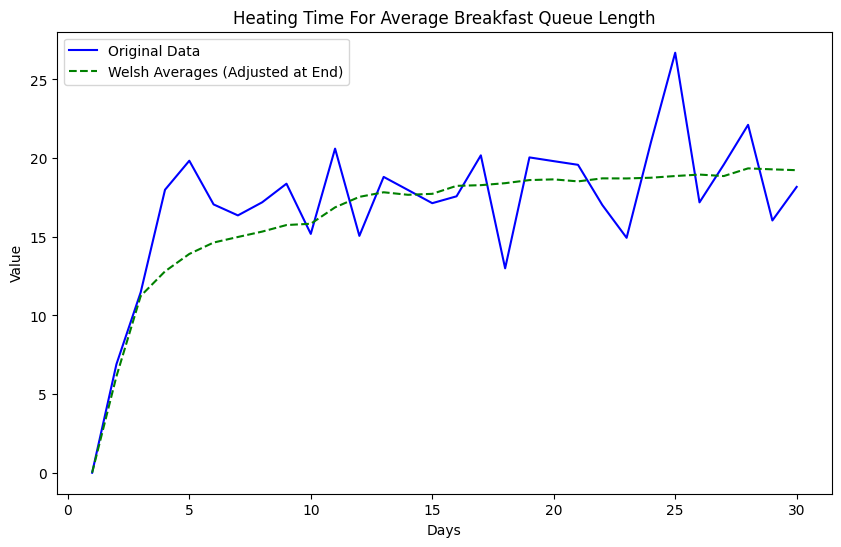

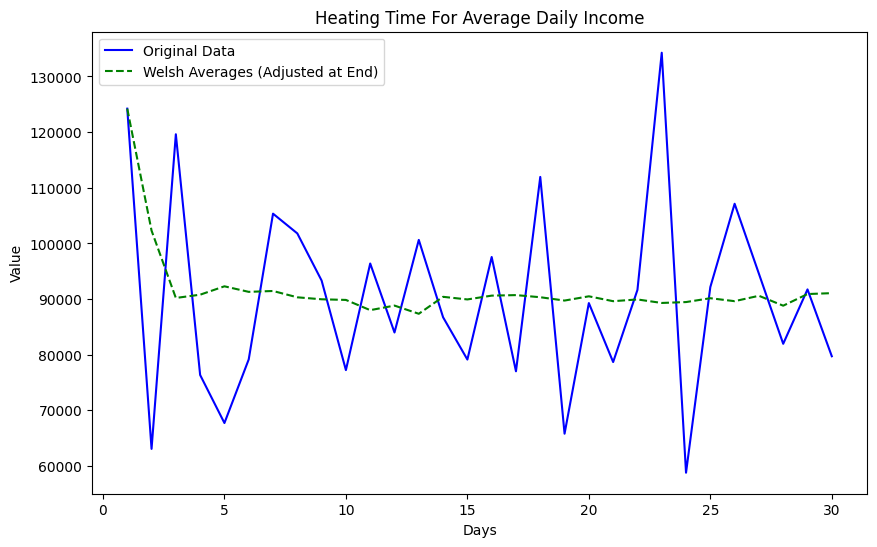

In [ ]:
sim = simulation(30)
sim.run()


sim.plot_heating_time_data(sim.queues['Breakfast queue'].daily_avg_queue_lengths, 'Average Breakfast Queue Length')
sim.plot_heating_time_data(sim.hotel.daily_income, 'Average Daily Income')

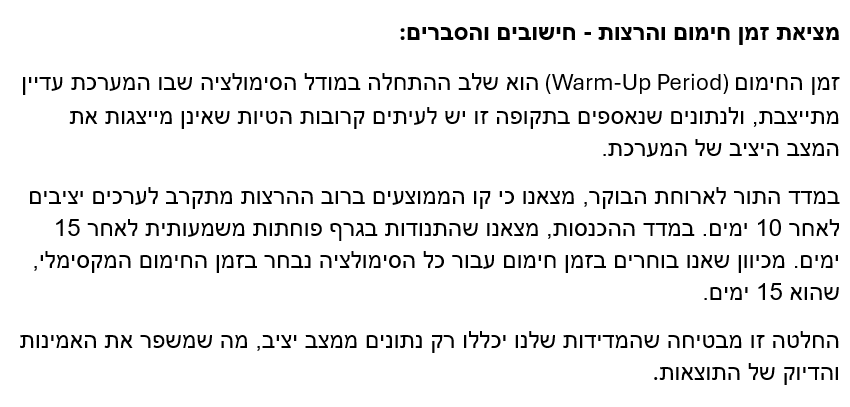

$$\text{על מנת לדעת כמה זמן להריץ את הסימולציה נלמד בכיתה שנהוג שזמן הריצה יהיה זמן החימום כפול 7, וזאת לאחר זמן החימום
}$$
$$\text{כלומר זמן הריצה הכולל יהיה 120 ימים}$$


In [ ]:
import pandas as pd

# Create a list to store all results
results = []

# Run 20 simulations
for _ in range(20):
    sim = simulation(120)
    sim.run()

    # Compute the results for each simulation and send them to the function
    avg_queue_lengths, income = sim.calculate_statistics()

    # Append the result to the list
    results.append({
        'avg_queue_lengths': avg_queue_lengths,
        'income': income
    })

# Create a table
df_results = pd.DataFrame(results)
df_results.index = range(1, 21)

# Calculate mean and standard deviation
average_values_basic = df_results.mean()
std_values_basic = df_results.std()

df_results.loc['Average'] = average_values_basic
df_results.loc['Standard Deviation'] = std_values_basic

# Store mean and standard deviation values in variables
avg_queue_mean_basic = average_values_basic['avg_queue_lengths']
income_mean_basic = average_values_basic['income']
avg_queue_std_basic = std_values_basic['avg_queue_lengths']
income_std_basic = std_values_basic['income']

print(df_results)


                    avg_queue_lengths        income
1                           17.453535  86909.752381
2                           17.684719  87264.971429
3                           17.055831  86207.647619
4                           17.425950  87604.580952
5                           16.849621  86001.552381
6                           16.916037  86123.095238
7                           17.223006  86825.400000
8                           17.559559  87511.228571
9                           17.145584  87042.809524
10                          17.522548  87221.580952
11                          16.929121  86283.800000
12                          17.560371  87334.333333
13                          17.445953  87569.133333
14                          17.267410  87667.076190
15                          17.393937  87107.142857
16                          17.437280  86750.647619
17                          17.249218  86957.714286
18                          17.462823  88068.171429
19          

$$\text{מציאת רווחי סמך למדדים על סמך 20 חזרות (לפני מציאת מספר הרצות)}$$
$$\text{ישנם שני מדדים ואנו רוצים לחתום על שניהם ברמת ביטחון של 90% ולכן נעשה זאת על ידי אי שוויון }$$
$$\text{בונפרוני ונאמר כי רמת המובקות עבור כל מדד היא 0.1/2 כלומר 0.05}$$


In [ ]:
import scipy.stats as stats

# Calculating confidence interval
def confidence_interval(mean, std_dev, n, alpha):
    confidence = 1 - alpha
    t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)  # Finding t based on the distribution
    margin_of_error = t_value * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound


lower_basic_income, upper_basic_income = confidence_interval(income_mean_basic, income_std_basic, 20, 0.05)
print(f"Confidence Interval for average income: [{lower_basic_income:.4f}, {upper_basic_income:.4f}]")

lower_basic_length, upper_basic_length = confidence_interval(avg_queue_mean_basic, avg_queue_std_basic, 20, 0.05)
print(f"Confidence Interval for average queue length for breakfast: [{lower_basic_length:.4f}, {upper_basic_length:.4f}]")



Confidence Interval for average income: [86730.5136, 87266.6502]
Confidence Interval for average queue length for breakfast: [17.1956, 17.4146]


$$\text{בדיקת דיוק יחסי של 0.1}$$

In [ ]:
from scipy.stats import t

def relative_accuracy(mean, std, gamma, alpha, n):
    # Finding T based on the distribution
    t_value = t.ppf(1 - alpha / 2, df=n - 1)
    delta = t_value * std / math.sqrt(n)
    relative_error = delta / mean

    # Checking the criterion
    meets_criterion = relative_error <= gamma / (1 + gamma)

    return relative_error, meets_criterion

gamma = 0.1
alpha = 0.05
n = 20

# Calculating results
metrics = ["Income", "Average Queue"]
means = [income_mean_basic, avg_queue_mean_basic]
stds = [income_std_basic, avg_queue_std_basic]

results = []
for metric, mean, std in zip(metrics, means, stds):
    relative_error, meets_criterion = relative_accuracy(mean, std, gamma, alpha, n)
    results.append([metric, relative_error, meets_criterion])

# Creating table
df = pd.DataFrame(results, columns=[" ", "    calculate", "   Criterion"])
print(df.to_string(index=False))


                  calculate    Criterion
       Income      0.003081         True
Average Queue      0.006329         True


$$\text{מצאנו על פי שיטת דיוק יחסי שמספר החזרות שביצענו (20 חזרות) מספיק לצורך רמת דיוק יחסי של 0.1}$$

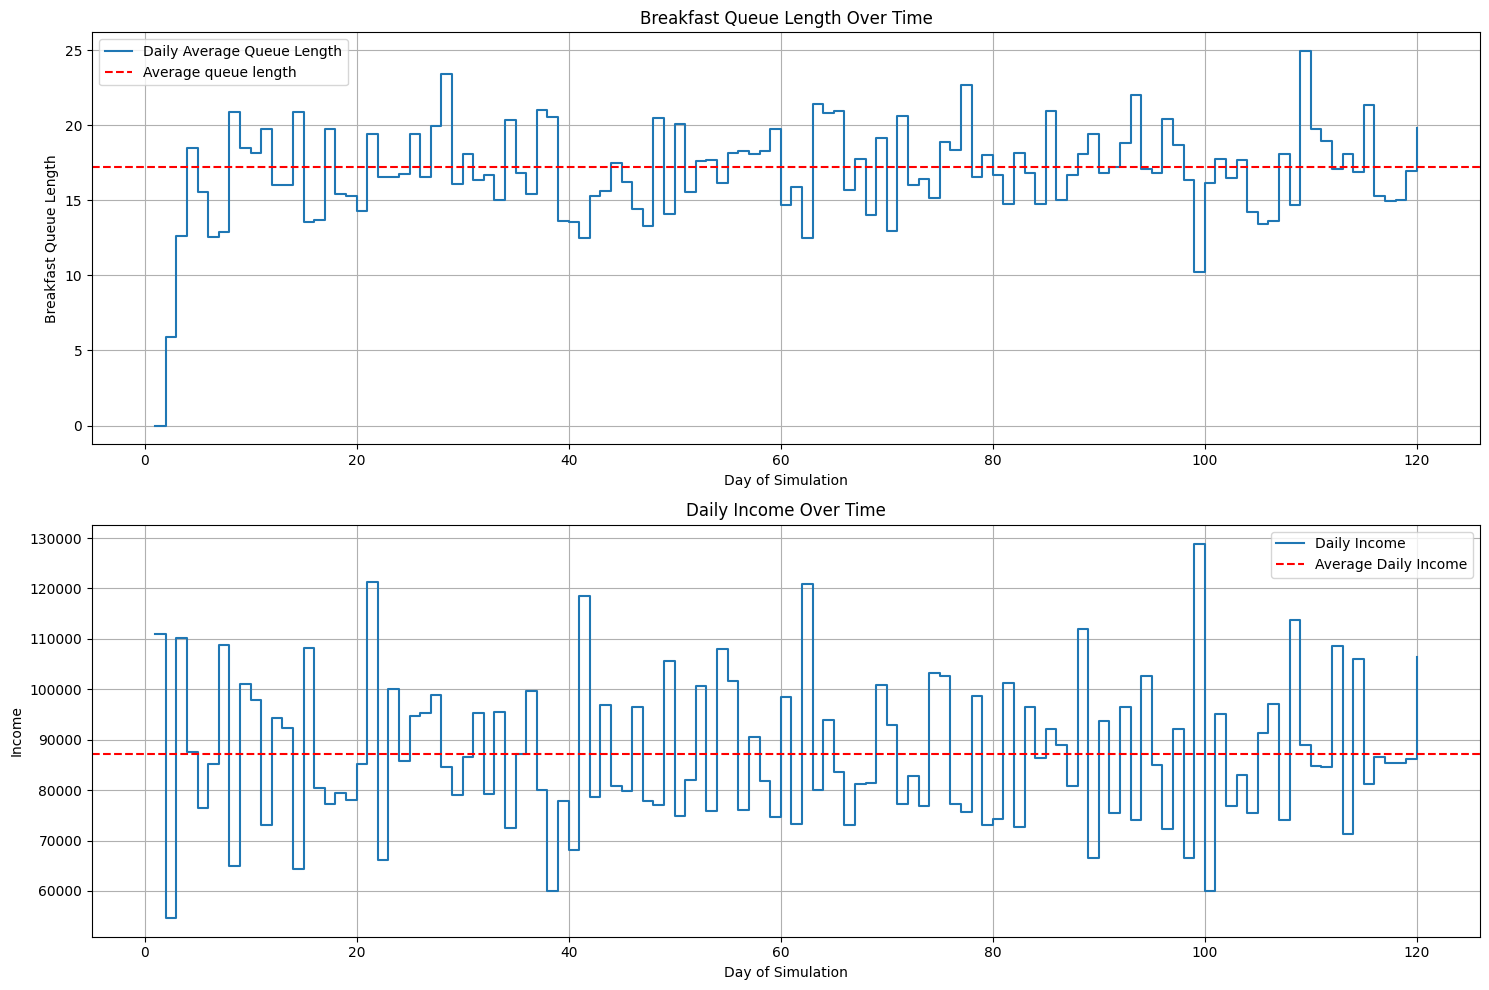

In [ ]:
sim.plot_metrics()

###$$\text{ביצוע חלופות:}$$

$$
\text{קומבינציית החלופות הראשונה:}
$$
$$
\text{ הרחבת חדר אוכל ל-80 סועדים. עלות - 200,000\$}
$$






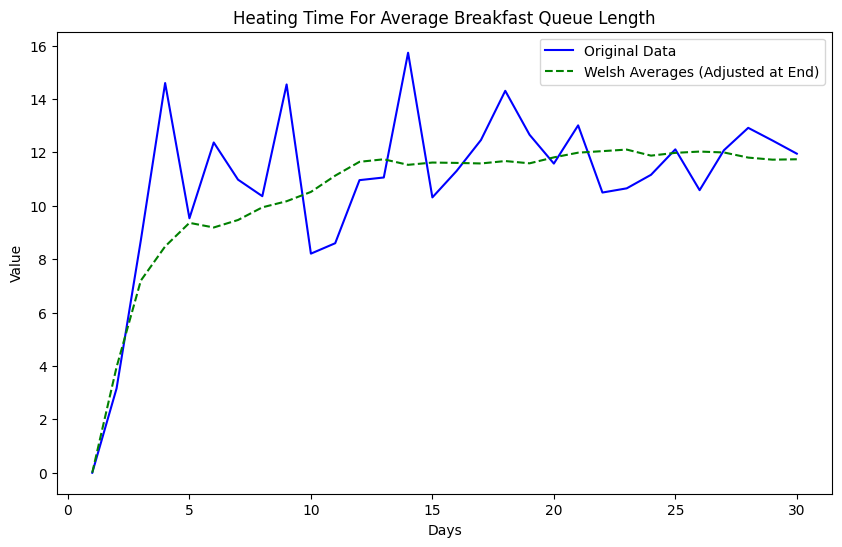

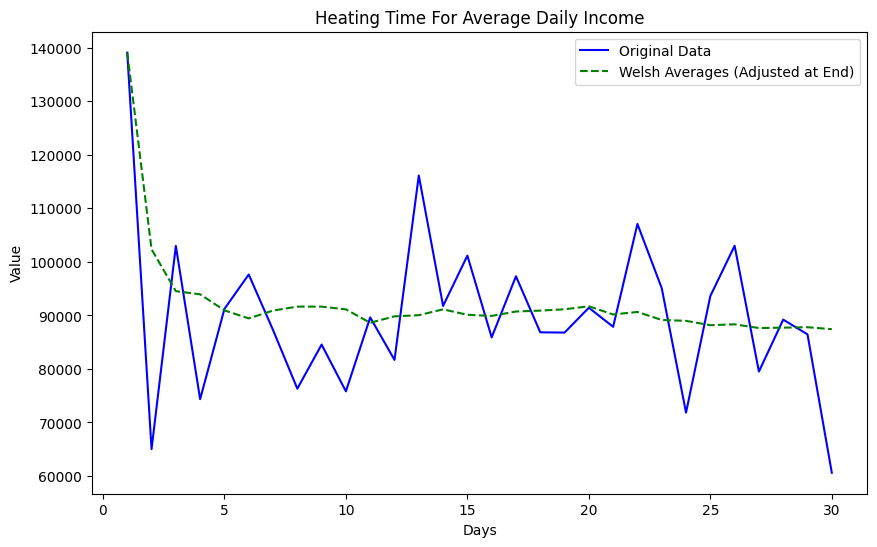

In [ ]:
sim = simulation(30, 80)
sim.run()

sim.plot_heating_time_data(sim.queues['Breakfast queue'].daily_avg_queue_lengths, 'Average Breakfast Queue Length')
sim.plot_heating_time_data(sim.hotel.daily_income, 'Average Daily Income')

$$\text{במדד התור לארוחת הבוקר, הממצאים מצביעים על התייצבות לאחר 15 ימים. }$$
$$\text{במדד ההכנסות, מצאנו כי התייצבות המדד מתרחשת לאחר 10 ימים. }$$
$$\text{מכיוון שאנו בוחרים בזמן חימום עבור כל הסימולציה נבחר בזמן החימום המקסימלי, שהוא 15 ימים.}$$
$$\text{מכאן שזמן הסימולציה יהיה 105 ימים, בנוסף ל-15 ימים שמהווים את זמן החימום.}$$


In [ ]:

# List to store all results
results = []

# Running 20 simulations
for _ in range(20):
    sim_alt1 = simulation(120, 80)
    sim_alt1.run()

    # Calculating results for each simulation
    avg_queue_lengths, income = sim_alt1.calculate_statistics()

    # Adding the result to the list
    results.append({
        'avg_queue_lengths': avg_queue_lengths,
        'income': income
    })

# Creating a results table
df_results = pd.DataFrame(results)
df_results.index = range(1, 21)

# Calculating averages and standard deviations
average_values = df_results.mean()
std_values = df_results.std()

df_results.loc['Average'] = average_values
df_results.loc['Standard Deviation'] = std_values

avg_queue_mean_alt1 = average_values['avg_queue_lengths']
income_mean_alt1 = average_values['income']
avg_queue_std_alt1 = std_values['avg_queue_lengths']
income_std_alt1 = std_values['income']

# Displaying the results
print(df_results)


                    avg_queue_lengths        income
1                           11.009640  87376.161905
2                           10.832714  86228.733333
3                           11.301526  87603.676190
4                           11.056224  86738.752381
5                           11.048042  87536.657143
6                           11.114878  87280.380952
7                           10.915094  87018.314286
8                           11.356748  89401.961905
9                           11.049697  86918.647619
10                          11.144363  86973.047619
11                          11.322829  88378.380952
12                          11.346671  88381.323810
13                          11.061592  86888.247619
14                          11.342792  88592.580952
15                          11.354250  88264.257143
16                          11.444678  88098.809524
17                          11.171846  87850.723810
18                          11.115018  88119.438095
19          

$$\text{מציאת רווחי סמך למדדים על סמך 20 חזרות (לפני מציאת מספר הרצות)}$$
$$\text{ישנם שני מדדים ואנו רוצים לחתום על שניהם ברמת ביטחון של 90% ולכן נעשה זאת על ידי אי שוויון }$$
$$\text{בונפרוני ונאמר כי רמת המובקות עבור כל מדד היא 0.1/2 כלומר 0.05}$$


In [ ]:

lower_alt1_income, upper_alt1_income = confidence_interval(income_mean_alt1, income_std_alt1, 20, 0.05)
print(f"Confidence Interval for average income: [{lower_alt1_income:.4f}, {upper_alt1_income:.4f}]")

lower_alt1_length, upper_alt1_length = confidence_interval(avg_queue_mean_alt1, avg_queue_std_alt1, 20, 0.05)
print(f"Confidence Interval for average queue length for breakfast: [{lower_alt1_length:.4f}, {upper_alt1_length:.4f}]")



Confidence Interval for average income: [87363.3637, 88130.3116]
Confidence Interval for average queue length for breakfast: [11.1059, 11.2800]


$$\text{בדיקת דיוק יחסי של 0.1}$$

In [ ]:

gamma = 0.1
alpha = 0.05
n = 20


metrics = ["Income", "Average Queue"]
means = [income_mean_alt1, avg_queue_mean_alt1]
stds = [income_std_alt1, avg_queue_std_alt1]

results = []
for metric, mean, std in zip(metrics, means, stds):
    relative_error, meets_criterion = relative_accuracy(mean, std, gamma, alpha, n)
    results.append([metric, relative_error, meets_criterion])


#create table
df = pd.DataFrame(results, columns=[" ", "    calculate", "   Criterion"])
print(df.to_string(index=False))

                  calculate    Criterion
       Income      0.004370         True
Average Queue      0.007776         True


$$\text{מצאנו על פי שיטת דיוק יחסי שמספר החזרות שביצענו (20 חזרות) מספיק לצורך רמת
דיוק יחסי של 0.1}$$

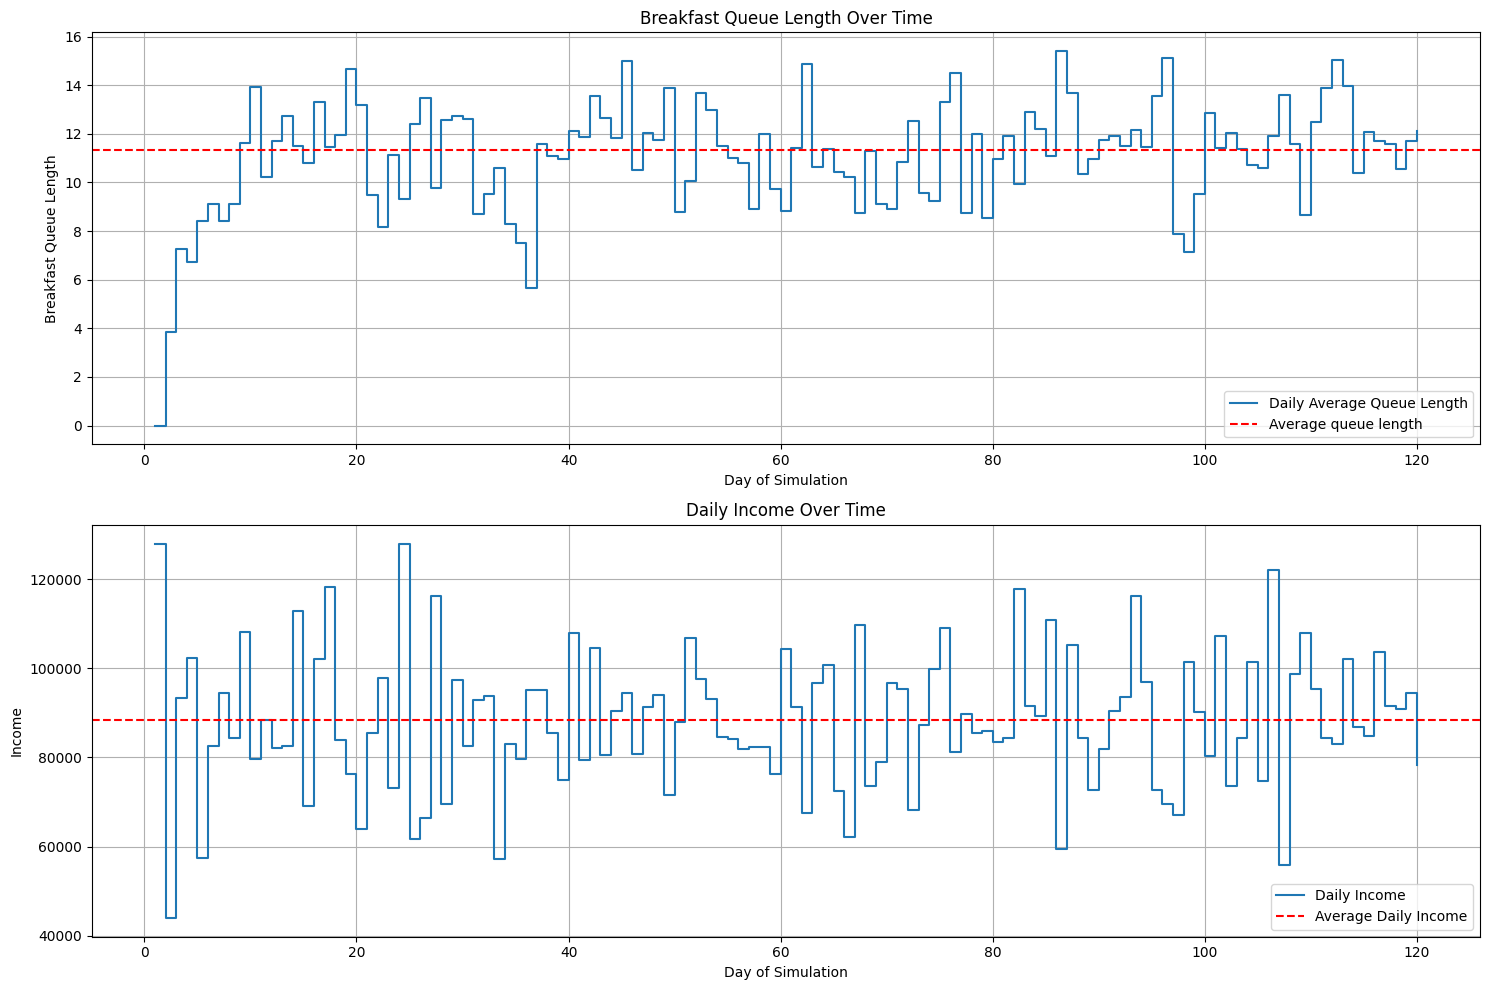

In [ ]:
sim_alt1.plot_metrics()

$$\text{קומבינציית החלופות השנייה:}$$

$$\text
{שדרוג מערכת הזמנות אינטרנטית. פיתוח מערכת הזמנות מתקדמת יותר. שיפור קצב הזמנת לקוחות כך שאלפא בנוסחה עולה 30. עלות - 250,000\$}$$

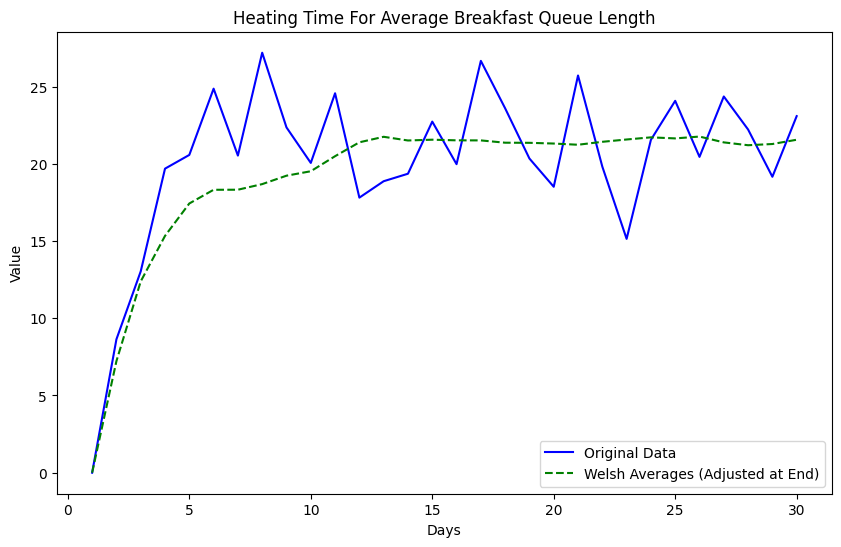

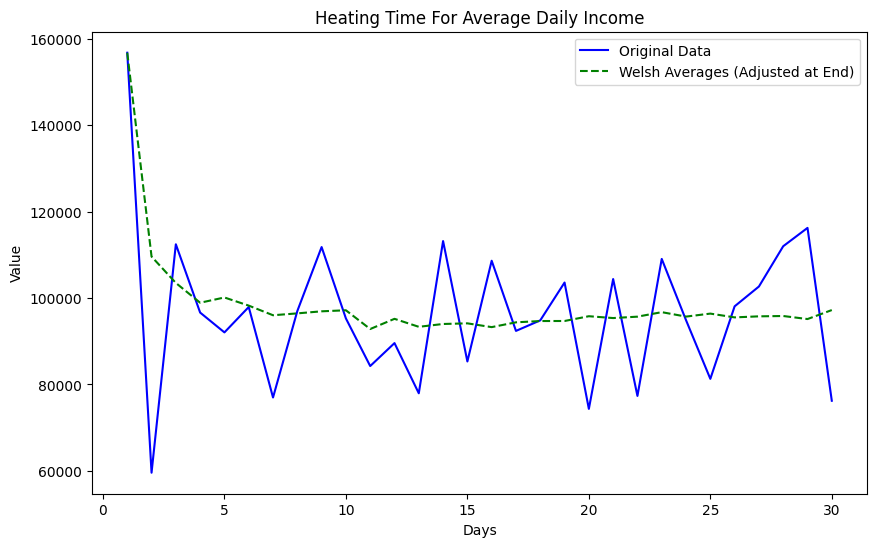

In [ ]:
sim_alt2 = simulation(30, alpha = 30)
sim_alt2.run()

sim_alt2.plot_heating_time_data(sim_alt2.queues['Breakfast queue'].daily_avg_queue_lengths, 'Average Breakfast Queue Length')
sim_alt2.plot_heating_time_data(sim_alt2.hotel.daily_income, 'Average Daily Income')

$$\text{במדד התור לארוחת הבוקר, הממצאים מצביעים על התייצבות לאחר 15 ימים. }$$
$$\text{במדד ההכנסות, מצאנו כי התייצבות המדד מתרחשת לאחר 10 ימים. }$$
$$\text{מכיוון שאנו בוחרים בזמן חימום עבור כל הסימולציה נבחר בזמן החימום המקסימלי, שהוא 15 ימים.}$$
$$\text{מכאן שזמן הסימולציה יהיה 105 ימים, בנוסף ל-15 ימים שמהווים את זמן החימום.}$$


In [ ]:
results = []

for _ in range(20):
    sim_alt2 = simulation(120, alpha=30)
    sim_alt2.run()

    avg_queue_lengths, income = sim_alt2.calculate_statistics()

    results.append({
        'avg_queue_lengths': avg_queue_lengths,
        'income': income
    })

# Creating a results table
df_results = pd.DataFrame(results)
df_results.index = range(1, 21)

# Calculating averages and standard deviations
average_values = df_results.mean()
std_values = df_results.std()

df_results.loc['Average'] = average_values
df_results.loc['Standard Deviation'] = std_values

avg_queue_mean_alt2 = average_values['avg_queue_lengths']
income_mean_alt2 = average_values['income']
avg_queue_std_alt2 = std_values['avg_queue_lengths']
income_std_alt2 = std_values['income']

# Displaying the results
print(df_results)


                    avg_queue_lengths        income
1                           20.735546  94217.523810
2                           20.997535  94639.409524
3                           21.301526  95122.000000
4                           20.923134  94872.200000
5                           20.923542  94434.523810
6                           21.258072  95188.819048
7                           21.574031  95259.847619
8                           20.861297  94135.809524
9                           21.240513  94171.142857
10                          21.280083  94993.761905
11                          20.982644  94809.619048
12                          21.393656  94985.133333
13                          20.780196  94352.104762
14                          21.026080  94367.590476
15                          21.005870  94846.447619
16                          21.309965  94323.561905
17                          21.163956  94138.342857
18                          21.033412  95282.228571
19          

$$\text{מציאת רווחי סמך למדדים על סמך 20 חזרות (לפני מציאת מספר הרצות)}$$
$$\text{ישנם שני מדדים ואנו רוצים לחתום על שניהם ברמת ביטחון של 90% ולכן נעשה זאת על ידי אי שוויון }$$
$$\text{בונפרוני ונאמר כי רמת המובקות עבור כל מדד היא 0.1/2 כלומר 0.05}$$


In [ ]:

lower_alt2_income, upper_alt2_income = confidence_interval(income_mean_alt2, income_std_alt2, 20, 0.05)
print(f"Confidence Interval for average income: [{lower_alt2_income:.4f}, {upper_alt2_income:.4f}]")

lower_alt2_length, upper_alt2_length = confidence_interval(avg_queue_mean_alt2, avg_queue_std_alt2, 20, 0.05)
print(f"Confidence Interval for average queue length for breakfast: [{lower_alt2_length:.4f}, {upper_alt2_length:.4f}]")



Confidence Interval for average income: [94515.6158, 94962.8233]
Confidence Interval for average queue length for breakfast: [21.0150, 21.2536]


$$\text{בדיקת דיוק יחסי של 0.1}$$


In [ ]:

gamma = 0.1
alpha = 0.05
n = 20


metrics = ["Income", "Average Queue"]
means = [income_mean_alt2, avg_queue_mean_alt2]
stds = [income_std_alt2, avg_queue_std_alt2]

results = []
for metric, mean, std in zip(metrics, means, stds):
    relative_error, meets_criterion = relative_accuracy(mean, std, gamma, alpha, n)
    results.append([metric, relative_error, meets_criterion])


# create table
df = pd.DataFrame(results, columns=[" ", "    calculate", "   Criterion"])
print(df.to_string(index=False))



                  calculate    Criterion
       Income      0.002360         True
Average Queue      0.005644         True


$$\text{מצאנו על פי שיטת דיוק יחסי שמספר החזרות שביצענו (20 חזרות) מספיק לצורך רמת דיוק יחסי של 0.1}$$

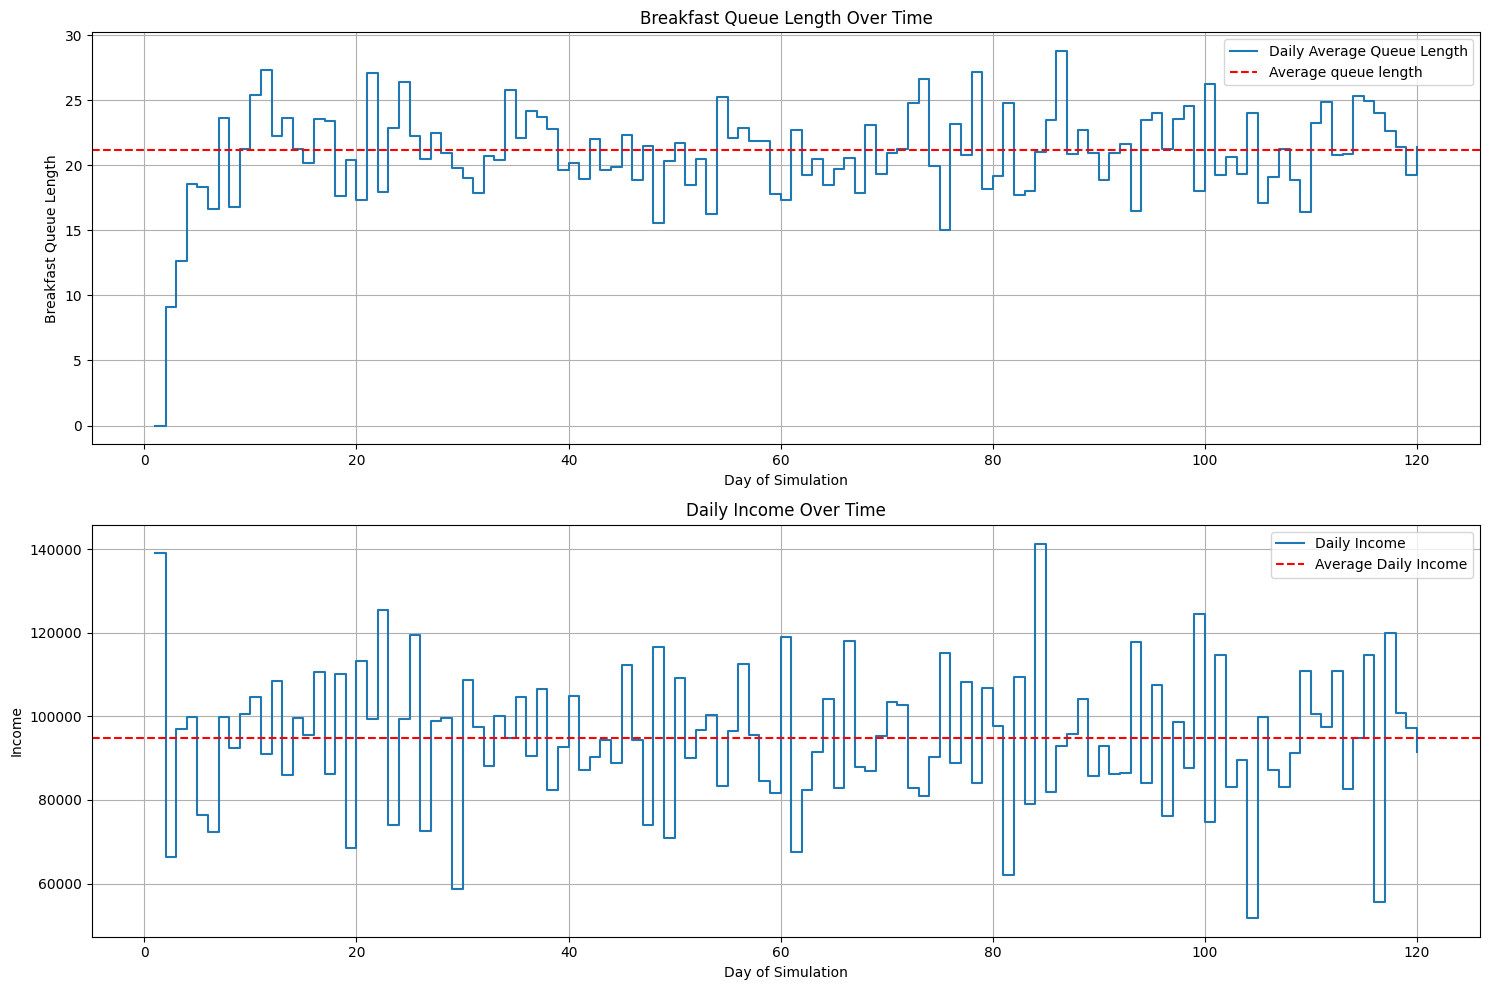

In [ ]:
sim_alt2.plot_metrics()

$$
\text{כעת נבצע השוואה בין חלופות באמצעות שיטת וולש, וזאת תחת ההנחות הבאות:}
$$
$$
\begin{aligned}
1. & \, \text{אין תלות בין ריצות מקבילות.} \\
2. & \, \text{אין תלות בין ריצות בכל חלופה בפני עצמה.} \\
3. & \, \text{לא ניתן להניח שוויון שונויות.} \\
4. & \, \text{תוצאות המדדים מתפלגות נורמלית.}
\end{aligned}
$$


In [ ]:

def welch_ttest(means, vars, type):

    # type refers to the type of optimization - min or max
    mean1 = means[0]
    mean2 = means[1]
    mean3 = means[2]

    variance1 = vars[0]
    variance2 = vars[1]
    variance3 = vars[2]

    n1 = 20
    n2 = 20
    n3 = 20

    # Pairwise differences
    pairs = [
        ('Current System vs Alternative 2', mean1 - mean2, variance1, n1, variance2, n2),
        ('Current System vs Alternative 3', mean1 - mean3, variance1, n1, variance3, n3),
        ('Alternative 2 vs Alternative 3', mean2 - mean3, variance2, n2, variance3, n3)
    ]

    # Bonferroni correction
    alpha = 0.05
    adjusted_alpha = alpha / 3

    # Calculate and print confidence intervals for each pair
    for name, mean_diff, var1, n1, var2, n2 in pairs:

        # Calculate the standard error of the difference
        standard_error = np.sqrt((var1 / n1) + (var2 / n2))

        # Degrees of freedom
        numerator = (var1/n1 + var2/n2)**2
        denominator = ( (var1**2) / ((n1**2) * (n1 - 1)) ) + ( (var2**2) / ((n2**2) * (n2 - 1)) )
        degrees_of_freedom = int(numerator / denominator)

        # Critical t-value using adjusted alpha
        t_crit = stats.t.ppf(1 - adjusted_alpha/2, degrees_of_freedom)

        # Confidence interval
        margin_of_error = t_crit * standard_error
        ci_lower = mean_diff - margin_of_error
        ci_upper = mean_diff + margin_of_error

        # Output results
        print(f"{name}:")
        print("  Confidence Interval: ({:.4f}, {:.4f})".format(ci_lower, ci_upper))

        if(type == "min"):
            if ci_lower > 0:
                print("  Preferred Alternative: The second in the pair (positive difference).")

            elif ci_upper < 0:
                print("  Preferred Alternative: The first in the pair (negative difference).")

            else:
                print("  No significant difference between the alternatives.")

        else:
            if ci_upper < 0:
                print("  Preferred Alternative: The second in the pair (negative difference).")
            elif ci_lower > 0:
                print("  Preferred Alternative: The first in the pair (positive difference).")
            else:
                print("  No significant difference between the alternatives.")
        print()

print('income')
means_income = [income_mean_basic, income_mean_alt1, income_mean_alt2]
vars_income = [income_std_basic**2, income_std_alt1**2, income_std_alt2**2]
welch_ttest(means_income, vars_income, "max")

print('queue')
means_queue = [avg_queue_mean_basic, avg_queue_mean_alt1, avg_queue_mean_alt2]
vars_queue = [avg_queue_std_basic**2, avg_queue_std_alt1**2, avg_queue_std_alt2**2]
welch_ttest(means_queue, vars_queue, "min")



income
Current System vs Alternative 2:
  Confidence Interval: (-1248.3811, -126.6104)
  Preferred Alternative: The second in the pair (negative difference).

Current System vs Alternative 3:
  Confidence Interval: (-8094.2049, -7265.5504)
  Preferred Alternative: The second in the pair (negative difference).

Alternative 2 vs Alternative 3:
  Confidence Interval: (-7530.1809, -6454.5829)
  Preferred Alternative: The second in the pair (negative difference).

queue
Current System vs Alternative 2:
  Confidence Interval: (5.9563, 6.2970)
  Preferred Alternative: The second in the pair (positive difference).

Current System vs Alternative 3:
  Confidence Interval: (-4.0107, -3.6187)
  Preferred Alternative: The first in the pair (negative difference).

Alternative 2 vs Alternative 3:
  Confidence Interval: (-10.1190, -9.7637)
  Preferred Alternative: The first in the pair (negative difference).



$$\text{לפי מבחן וולש ניתו להבין שחלופה 2 עדיפה על המצב הקיים מבחינת אורך תור ממוצע לאורח הבוקר אך מבחינת המדד השני, של הכנסה יומית ממוצעת חלופה 3 עדיפה.}$$
$$\text{מכיוון שבית מלון הוא עסק רווחי נעדיף לתת חשיבות גדולה למדד ההכנסה ולכן נבחר בחלופה 3.}$$

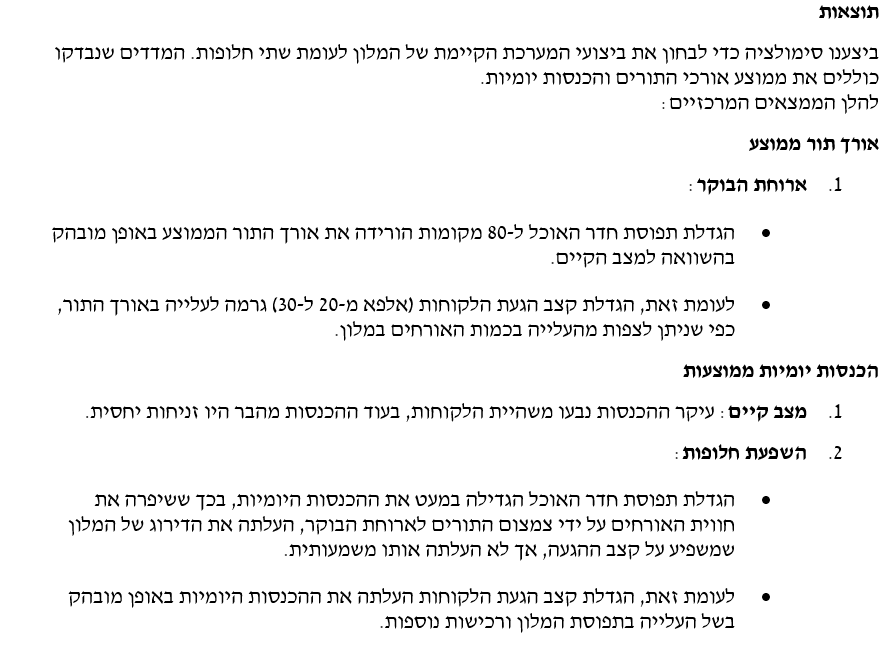

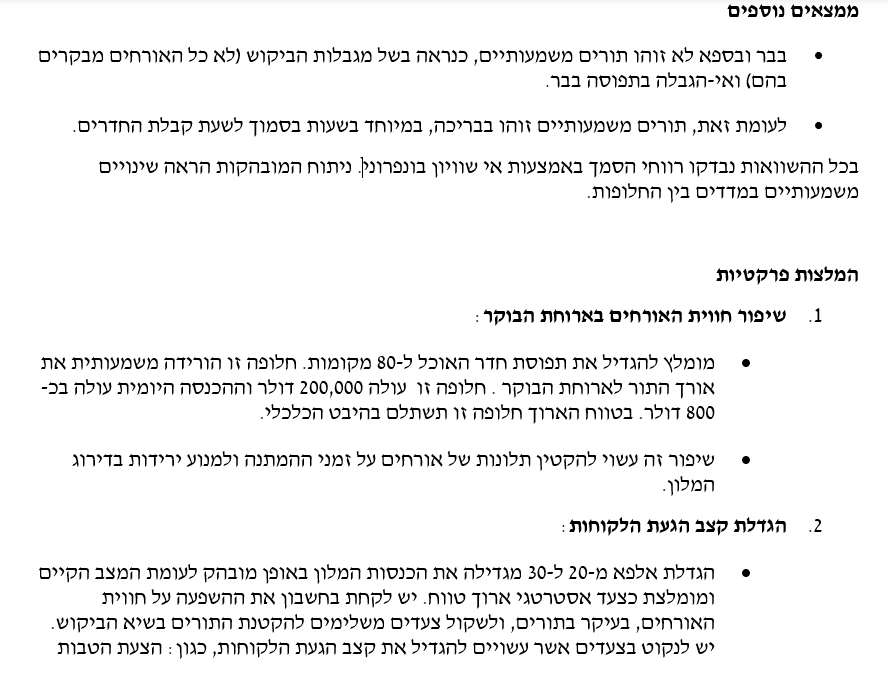

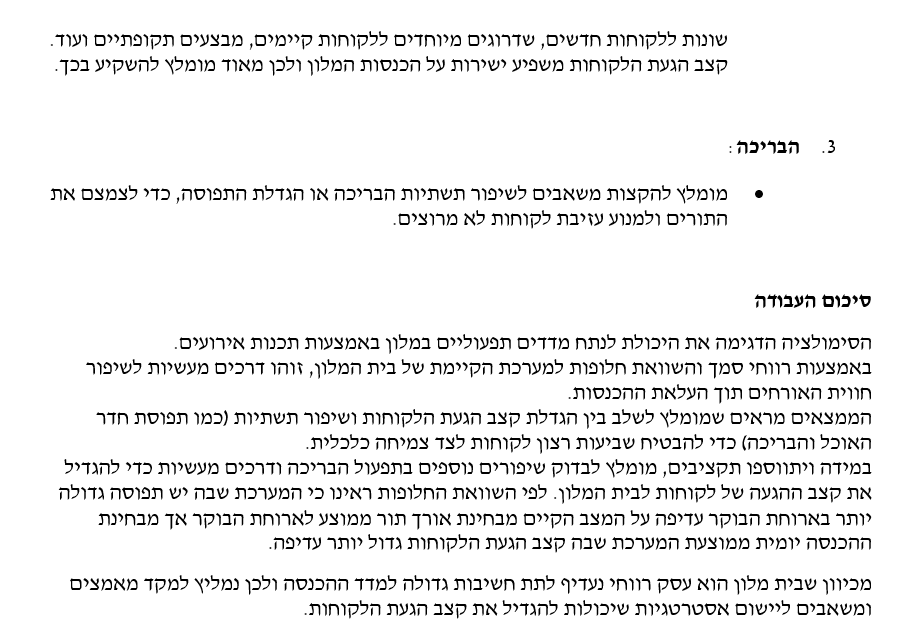